# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain.

Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

## Data Fields

MSSubClass: Identifies the type of dwelling involved in the sale.   

MSZoning: Identifies the general zoning classification of the sale.

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city li

Condition1: Proximity to various conditions

Condition2: Proximity to various conditions (if more than one is present)

HouseStyle: Style of dwelling

OverallQual: Rates the overall material and finish of the house

OverallCond: Rates the overall condition of the house

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 

ExterCond: Evaluates the present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Evaluates the height of the basement

BsmtCond: Evaluates the general condition of the basement

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

SaleCondition: Condition of sale

## Importing the Libraries

In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

sns.set(style="whitegrid")

plt.style.use('ggplot')
from scipy.stats import norm, skew #for some statistics

from subprocess import check_output

import plotly.express as px
import plotly.offline
import plotly.graph_objs as go

import warnings
warnings.simplefilter('ignore')

In [11]:
#Uploading the train and the test csv files
train = pd.read_csv('dataset/house-price-train.csv')
test = pd.read_csv('dataset/house-price-test.csv')

In [12]:
#Let's see the train set
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

Here we can see that in our train dataset we have 1168 rows and 81 columns, where SalesPrice is our Target column.

In [13]:
ID = test['Id']

lets store the test Id column into the ID variable, which we will use later in the prediction process.

## Data Exploration


In [14]:
# Check number of train & test examples
train.shape, test.shape

((1168, 81), (292, 80))

The shape of the train set us 1168 rows and 81 columns ,

while the shape of the test set is 292 rows and 80 columns

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Here we can see that we have 43 object datatype columns,35 integer type and 3 float datatype columns present in the train dataset

In [16]:
#describe
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

From here we can see that the some columns have the mean greater than the median and also the standard deviation is very high in some columns. Here the difference between the 75% and the max. is high some columns, i.e. outliers are also present and also the data is skewed.

In [17]:
#lets check the missing values percentage according to columns in both train and test dataset
def missing_percent(df):
    missing = df.isna().mean().sort_values(ascending=False).head(20)*100
    missing = pd.DataFrame({'missing %age': missing})
    fig = px.bar(data_frame=missing, x=missing.index, y='missing %age')
    fig.show()
    return missing

In [18]:
print(missing_percent(train))

              missing %age
PoolQC           99.400685
MiscFeature      96.232877
Alley            93.407534
Fence            79.708904
FireplaceQu      47.174658
LotFrontage      18.321918
GarageYrBlt       5.479452
GarageFinish      5.479452
GarageType        5.479452
GarageQual        5.479452
GarageCond        5.479452
BsmtExposure      2.654110
BsmtFinType2      2.654110
BsmtQual          2.568493
BsmtCond          2.568493
BsmtFinType1      2.568493
MasVnrType        0.599315
MasVnrArea        0.599315
Id                0.000000
Functional        0.000000


Here , we can see that in our tarin dataset the columns name PoolQC, MiscFeature and Alley have very high number of missing values.

In [19]:
print(missing_percent(test))


              missing %age
PoolQC          100.000000
MiscFeature      96.575342
Alley            95.205479
Fence            84.931507
FireplaceQu      47.602740
LotFrontage      15.410959
GarageType        5.821918
GarageYrBlt       5.821918
GarageQual        5.821918
GarageCond        5.821918
GarageFinish      5.821918
BsmtCond          2.397260
BsmtFinType2      2.397260
BsmtFinType1      2.397260
BsmtQual          2.397260
BsmtExposure      2.397260
MasVnrArea        0.342466
MasVnrType        0.342466
Electrical        0.342466
HalfBath          0.000000


In our test dataset the PoolQC, MiscFeature and Alley have very high percentage of missing values.

In [20]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

Lets drop the ID column from both datasets as it is not important for our further processes.

# Checking the correlation

In [21]:
train.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.365220 -0.124151     0.070462    -0.056978   
LotFrontage     -0.365220     1.000000  0.557257     0.247809    -0.053345   
LotArea         -0.124151     0.557257  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.247809  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.053345  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.118554  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.096050  0.027228     0.555945     0.080669   
MasVnrArea       0.027868     0.202225  0.121448     0.409163    -0.137882   
BsmtFinSF1      -0.052236     0.247780  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403     0.002514  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.123943  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.386261  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.448186  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.099250  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.007885 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.410414  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.104255  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001528  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.189321  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.053168  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.264010  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002890 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.351969  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.262076  0.285983     0.390067    -0.013632   
GarageYrBlt      0.077630     0.061101 -0.034981     0.541719    -0.318278   
GarageCars      -0.027639     0.276798  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.344908  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.101751  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.167092  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.023118 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.059508  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.033111  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.223429  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.004559  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.025046  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.004296 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.341294  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.023988      0.056618    0.027868   -0.052236   -0.062403   
LotFrontage     0.118554      0.096050    0.202225    0.247780    0.002514   
LotArea         0.005506      0.027228    0.121448    0.221851    0.056656   
OverallQual     0.575800      0.555945    0.409163    0.219643   -0.040893   
OverallCond    -0.377731      0.080669   -0.137882   -0.028810    0.044336   
YearBuilt       1.000000      0.592829    0.323006    0.227933   -0.027682   
YearRemodAdd    0.592829      1.000000    0.181869    0.114430   -0.044694   
MasVnrArea      0.323006      0.181869    1.000000    0.267066   -0.065723   
BsmtFinSF1      0.227933      0.114430    0.267066    1.000000   -0.052145   
BsmtFinSF2     -0.027682     -0.044694   -0.065723   -0.052145    1.000000   
BsmtUnfSF       0.155559      0.174732    0.109850   -0.499861   -0.213580   
TotalBsmtSF     0.386265      0.280720    0.366833    0.518940    0.098167   
1stFlrSF        0.279450      0.2333

Above table lots of columns so its not possible to check the correlation between every dependent column and the target column. Therefore, we will use Target column(saleprice) and check each correlation of each column with it.

In [22]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64

Here we can see that OverallQual and GrLivArea are positively highly correlated with the Sale Price , while the KitchenAbvGr and EnclosedPorch are negatively highly correlated with SalePrice which is our target column.

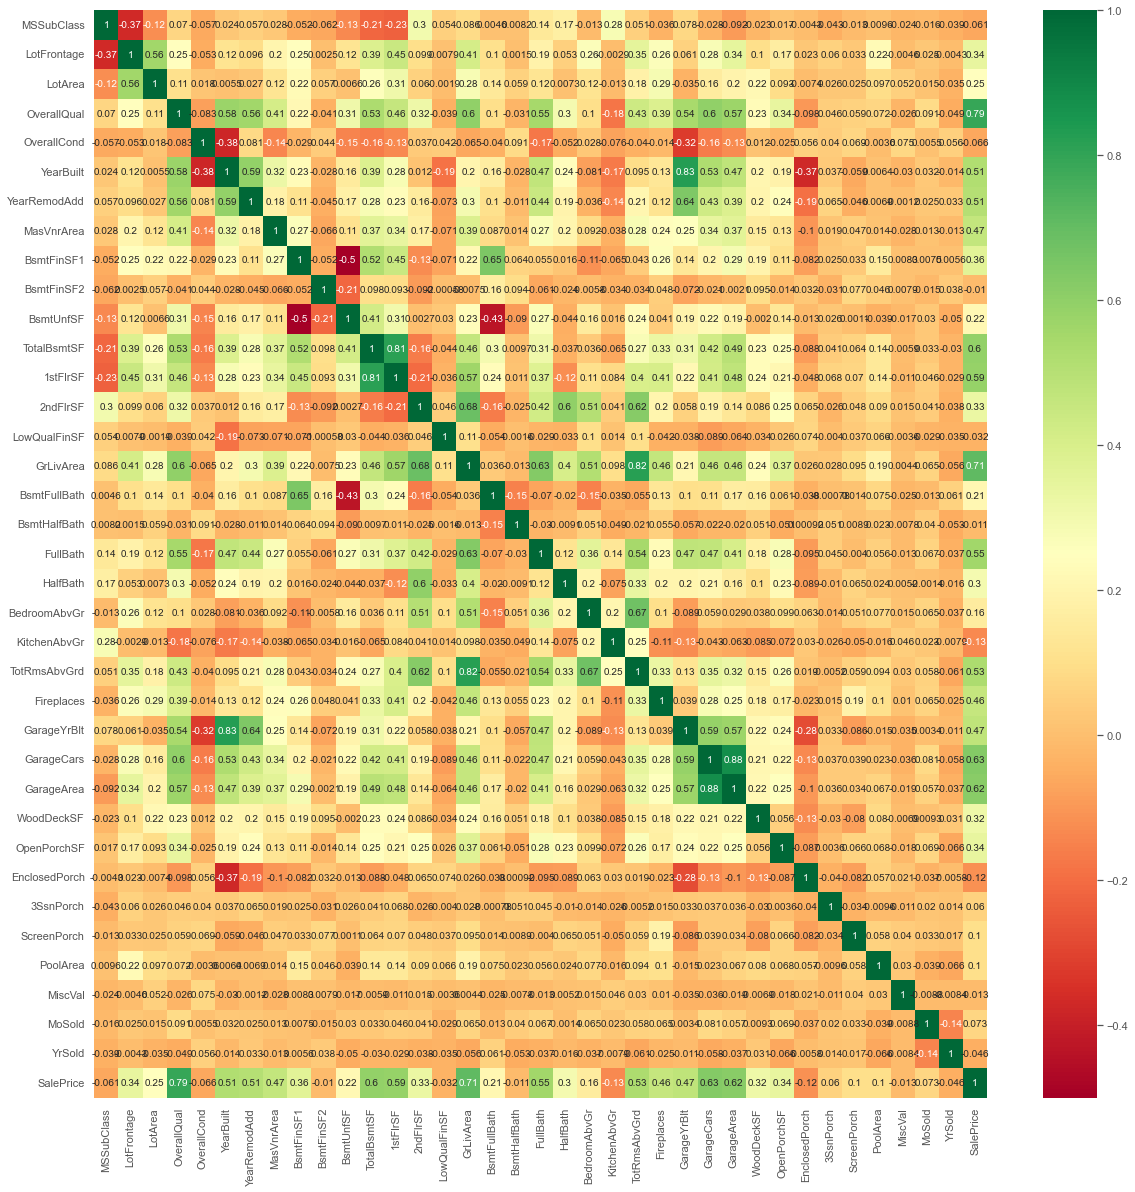

In [23]:
#Lets see the graphical representation of the correlation
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Here we can see that OverallQual (Overall Quality ) and GrLivArea ('Above Grade' Living Area (this is the proportion of the house that is not in a basement;)) are highly correalted to our target column(Sales Price).

The other 6 six variables with a higher correlation with SalePrice are: -TotalBsmtSF: Total square feet of basement area -1stFlrSF: First Floor square feet -FullBath: Full bathrooms above grade -TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) -YearBuilt: Original construction date -YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

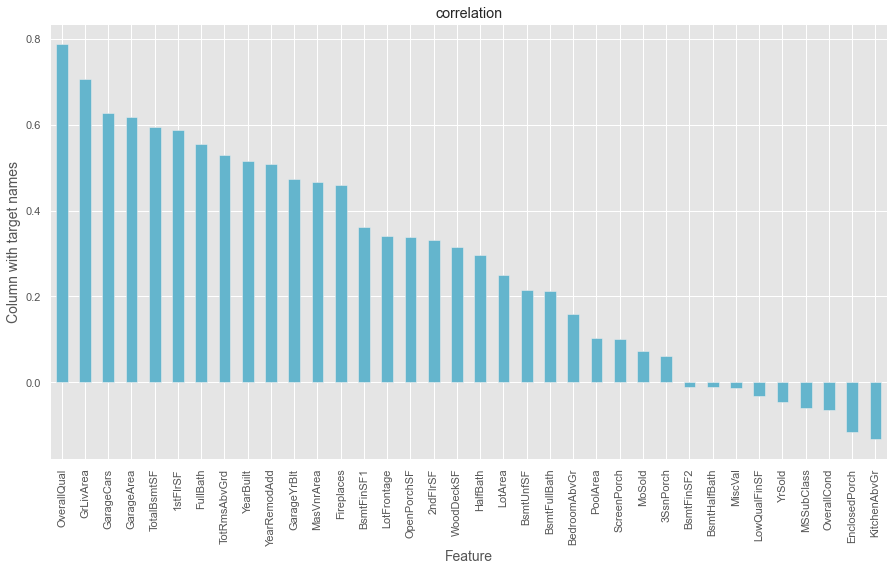

In [24]:
plt.figure(figsize=(15,8))
train.corr()['SalePrice'].sort_values(ascending = False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation')
plt.show()

Here we can see more clearly that Overall and GrLivArea are highly positively correlated with the target column which is Sale Price , while Kitchen above grade and enclosed porch area are highly negatively correlated with the Sale Price

In [25]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values, it includes both numeric and Categorical features
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]


## 2- step print the feature name and the percentage of missing values

# Here mean will give mean value based on [No of isnull() record]/ [Total no of record]
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1832  % missing values
Alley 0.9341  % missing values
MasVnrType 0.006  % missing values
MasVnrArea 0.006  % missing values
BsmtQual 0.0257  % missing values
BsmtCond 0.0257  % missing values
BsmtExposure 0.0265  % missing values
BsmtFinType1 0.0257  % missing values
BsmtFinType2 0.0265  % missing values
FireplaceQu 0.4717  % missing values
GarageType 0.0548  % missing values
GarageYrBlt 0.0548  % missing values
GarageFinish 0.0548  % missing values
GarageQual 0.0548  % missing values
GarageCond 0.0548  % missing values
PoolQC 0.994  % missing values
Fence 0.7971  % missing values
MiscFeature 0.9623  % missing values


##### Since there are many missing values, we need to find the relationship between missing values and Sales Price

Let's plot some diagram for this relationship

LotFrontage
0    160000.0
1    172250.0
Name: SalePrice, dtype: float64


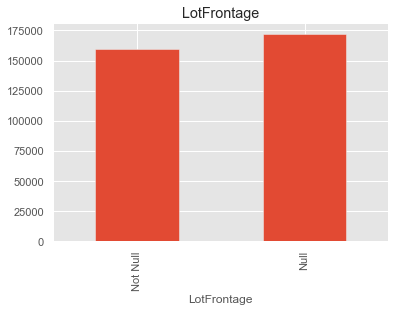

Alley
0    145000.0
1    165500.0
Name: SalePrice, dtype: float64


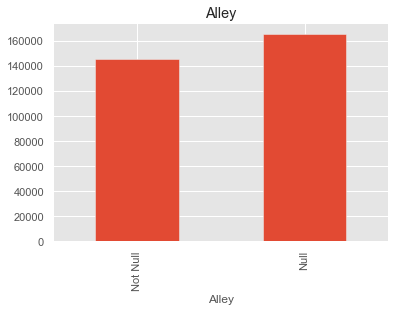

MasVnrType
0    163000.0
1    205950.0
Name: SalePrice, dtype: float64


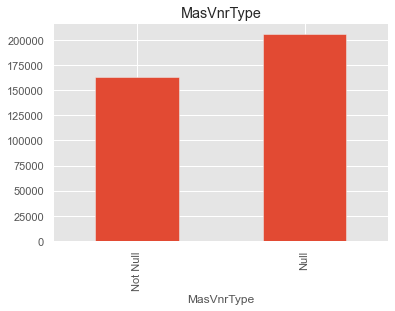

MasVnrArea
0    163000.0
1    205950.0
Name: SalePrice, dtype: float64


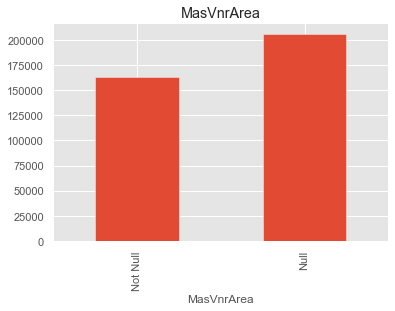

BsmtQual
0    165325.0
1    106375.0
Name: SalePrice, dtype: float64


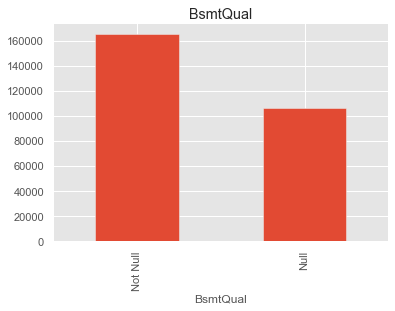

BsmtCond
0    165325.0
1    106375.0
Name: SalePrice, dtype: float64


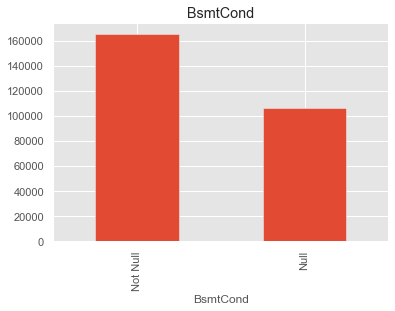

BsmtExposure
0    165150.0
1    106500.0
Name: SalePrice, dtype: float64


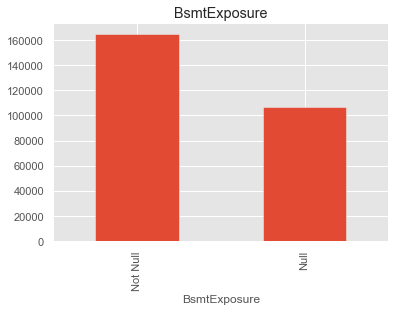

BsmtFinType1
0    165325.0
1    106375.0
Name: SalePrice, dtype: float64


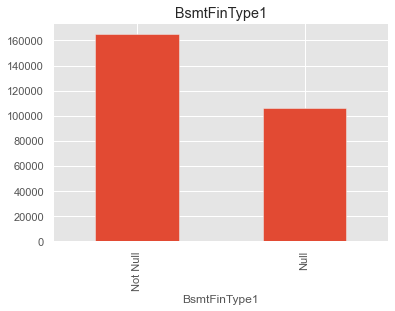

BsmtFinType2
0    165150.0
1    106500.0
Name: SalePrice, dtype: float64


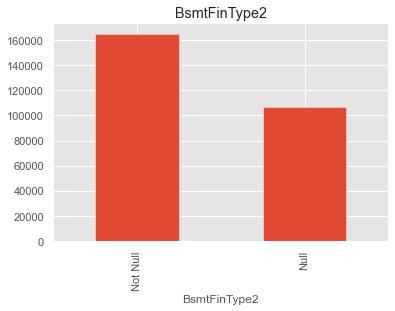

FireplaceQu
0    192000.0
1    136000.0
Name: SalePrice, dtype: float64


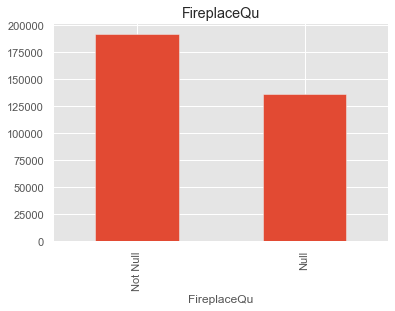

GarageType
0    168250.0
1     97500.0
Name: SalePrice, dtype: float64


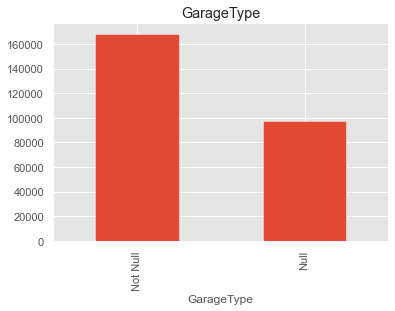

GarageYrBlt
0    168250.0
1     97500.0
Name: SalePrice, dtype: float64


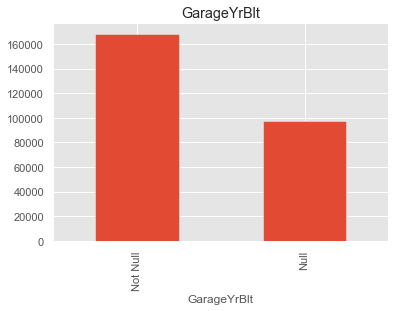

GarageFinish
0    168250.0
1     97500.0
Name: SalePrice, dtype: float64


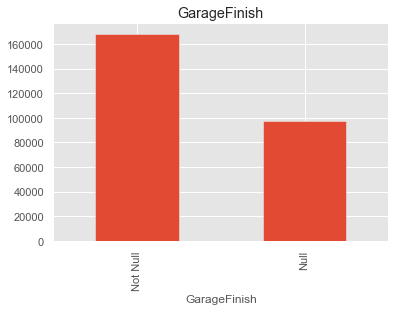

GarageQual
0    168250.0
1     97500.0
Name: SalePrice, dtype: float64


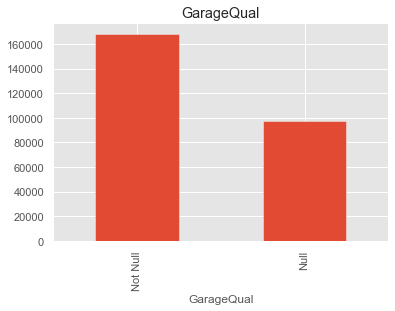

GarageCond
0    168250.0
1     97500.0
Name: SalePrice, dtype: float64


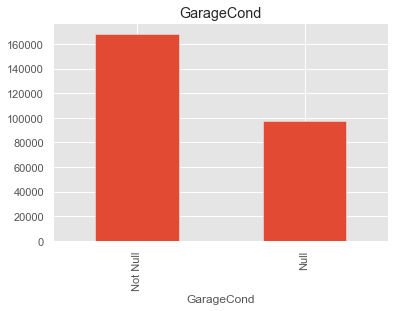

PoolQC
0    235000.0
1    163000.0
Name: SalePrice, dtype: float64


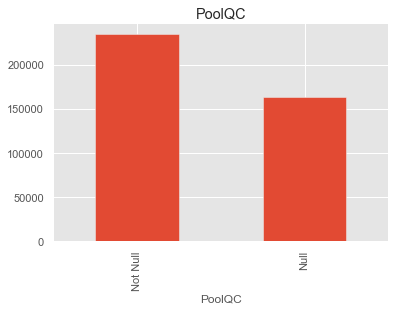

Fence
0    142000.0
1    174000.0
Name: SalePrice, dtype: float64


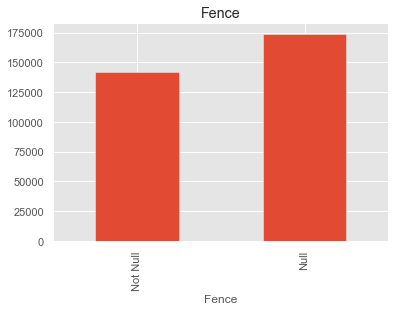

MiscFeature
0    148000.0
1    165000.0
Name: SalePrice, dtype: float64


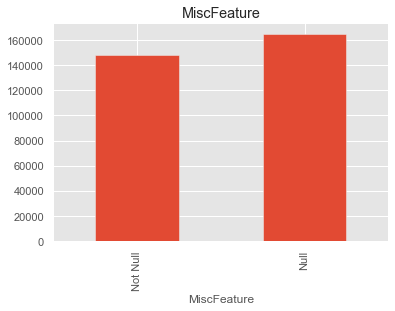

In [26]:
for feature in features_with_na:
    data = train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    #Here it replaces specific feature value by 0 or 1, if null then 1,else 0
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing(1) or present(0)
    
    print(data.groupby(feature)['SalePrice'].median())
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xticks([0,1],['Not Null', 'Null'])
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful value

In [27]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  37


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120          NaN     4928            6            5       1976   
1          20         95.0    15865            8            6       1970   
2          60         92.0     9920            7            5       1996   
3          20        105.0    11751            6            6       1977   
4          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1976         0.0         120           0  ...           0   
1          1970         0.0         351         823  ...          81   
2          1997         0.0         862           0  ...         180   
3          1977       480.0         705           0  ...           0   
4          2000       126.0        1246           0  ...         240   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          205              0          0            0         0        0   
1          207              0          0          224         0        0   
2          130              0          0            0         0        0   
3          122              0          0            0         0        0   
4            0              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2007     128000  
1      10    2007     268000  
2       6    2007     269790  
3       1    2010     190000  
4       6    2009     215000  

[5 rows x 37 columns]

## Temporal Variables(Eg: Datetime Variables)

From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold

In [28]:
# list of variables that contain year information
# Here we are identifying year related field based on field name 'yr' or 'year'

year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [29]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, train[feature].unique())

YearBuilt [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]
YearRemodAdd [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]
GarageYrBlt [1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 1987. 200

## Lets analyze the Temporal Datetime Variables

We will check whether there is a relation between year the house is sold and the sales price

YrSold
2006    164995.0
2007    168500.0
2008    164000.0
2009    160100.0
2010    157950.0
Name: SalePrice, dtype: float64


Text(0.5, 1.0, 'House Price vs YearSold')

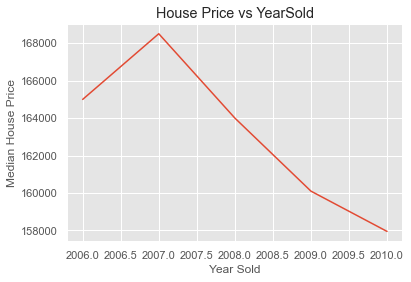

In [30]:
# Group based on 'YrSold' and take median for that yearsold
print(train.groupby('YrSold')['SalePrice'].median())

train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

Here we can see that the median house price was high on 2007 and then reduced, ITS NOT THE REAL Case, so we will compare with other years as well

In [31]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

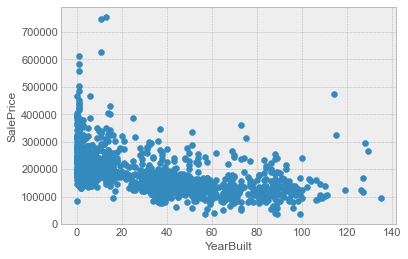

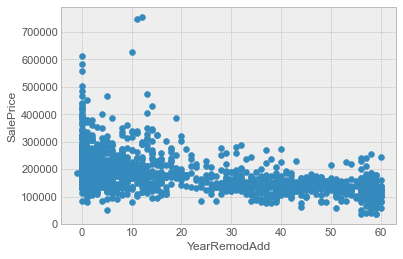

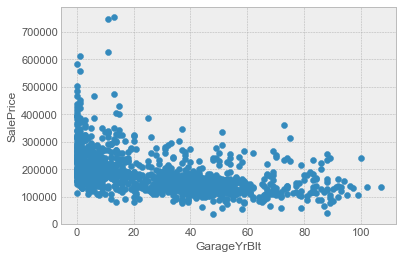

In [32]:
# Here we will compare the difference between All years feature with SalePrice
# Here we are taking difference of "year field" and "year_sold" --> This will be x axis and SalePrice price is the y axis
plt.style.use('bmh')

for feature in year_feature:
    if feature!='YrSold':
        data=train.copy()
        ## We will capture the difference between year variable and year the house was sold for
        # Here data[actualfeature] = difference of YrSold and yearfeature  
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

"Other year field" value near to "year sold" then price is high(Means its a new house), if difference is large(If its 140 yr old house) then price is less and values distributed with all different prices for same year difference in starting.

## Distribution of the Numerical Variables

Numerical variables are usually of 2 type

Discrete Variables

If distinct values in numeric variable is <25, those are considered as discrete,else its continous

Bar Plot used for discrete variable

Continuous variable

Histogram Plot used for Continuous variable

## Discrete Variables

In [33]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [34]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [35]:
train[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0         120            6            5             0             0   
1          20            8            6             0             1   
2          60            7            5             0             1   
3          20            6            6             0             0   
4          20            6            7             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         0             2             1             5   
1             0         2         0             4             1             8   
2             0         2         1             3             1             8   
3             0         2         0             3             1             7   
4             1         2         0             3             1             8   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           1           2          0         0        0       2  
1           1           2          0         0        0      10  
2           1           2          0         0        0       6  
3           1           2          0         0        0       1  
4           1           2          0         0        0       6

## Relationship between Discrete Variables and Sales Price

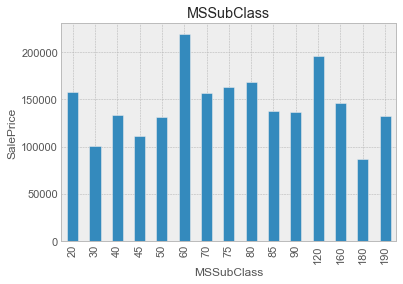

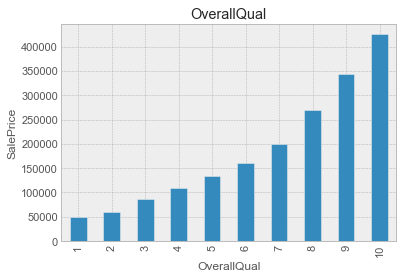

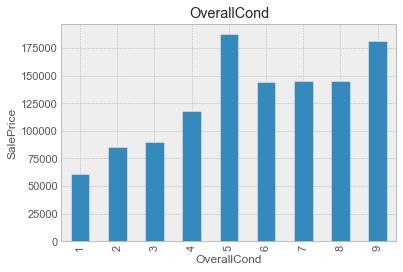

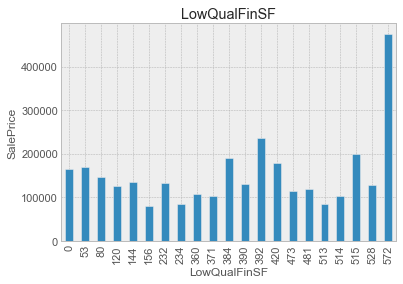

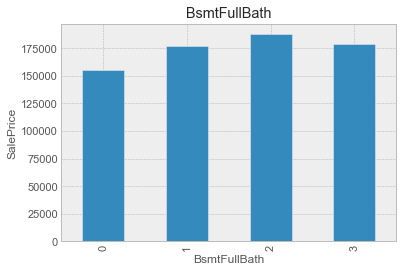

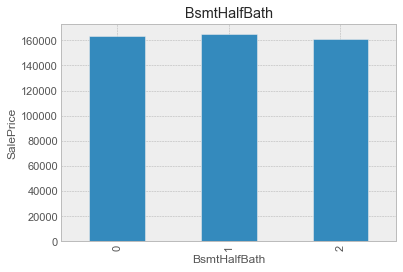

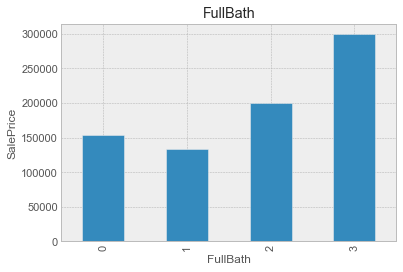

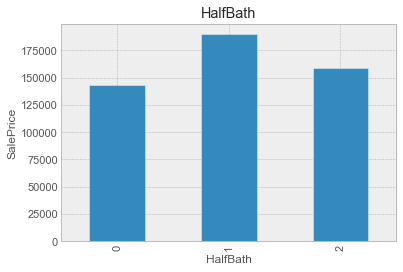

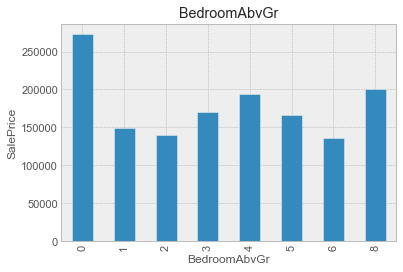

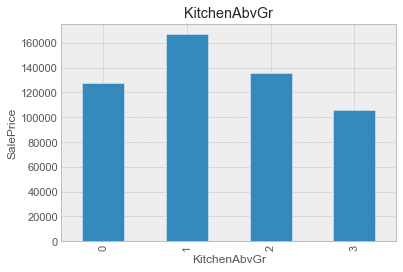

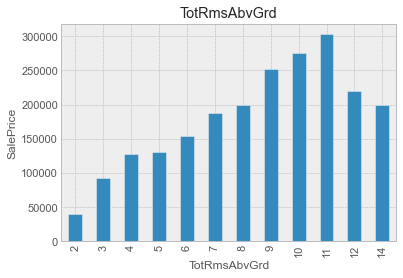

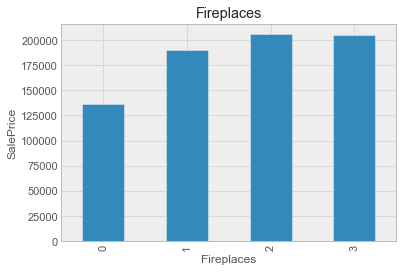

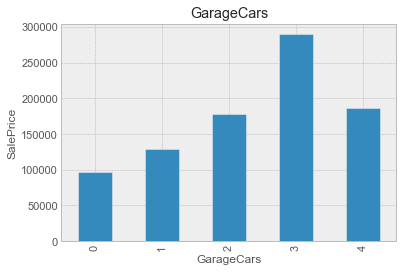

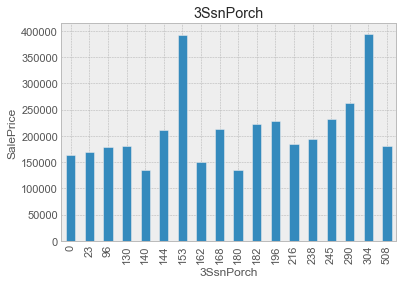

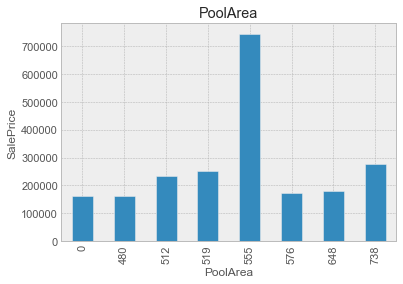

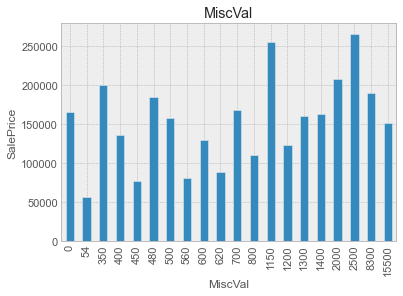

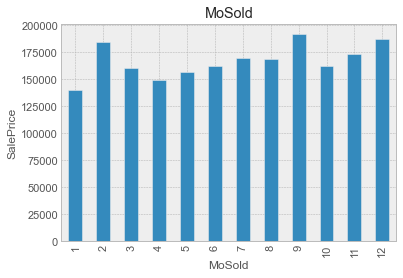

In [36]:
## Lets Find the realtionship between them and Sale Price
plt.style.use('bmh')
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

There is a relationship between discrete variable number and SalePrice, if number increases Sales price increases in many cases

## Continuous Variables

In [37]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


In [38]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

### Histogram/Count of Continuous Variable

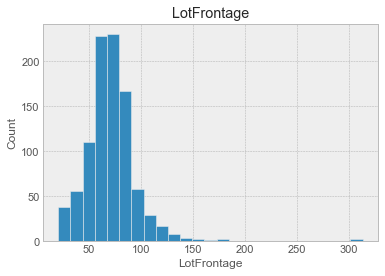

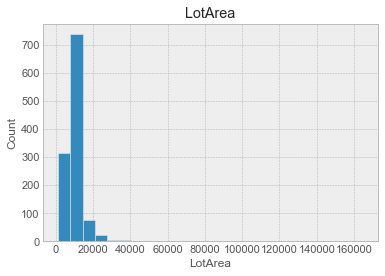

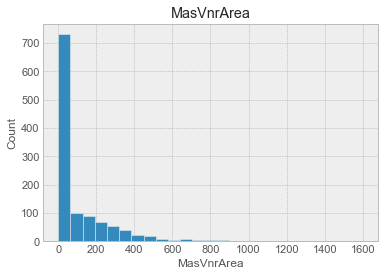

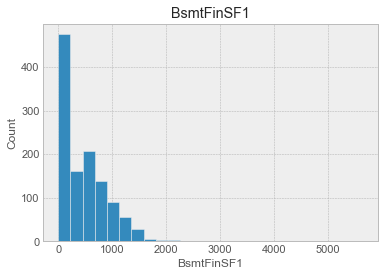

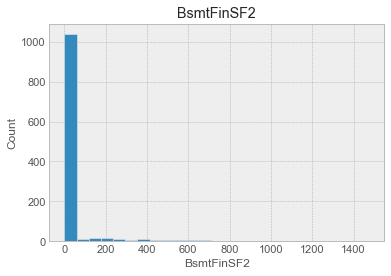

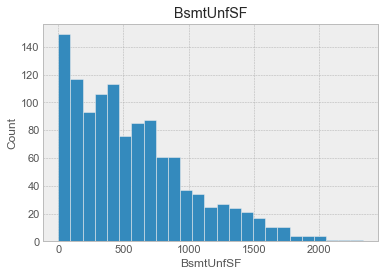

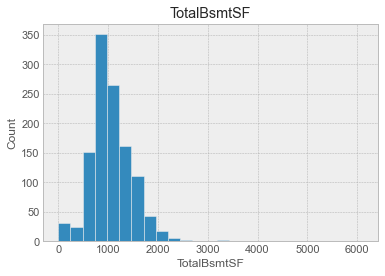

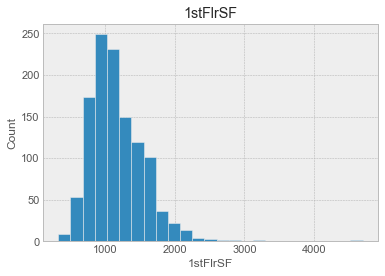

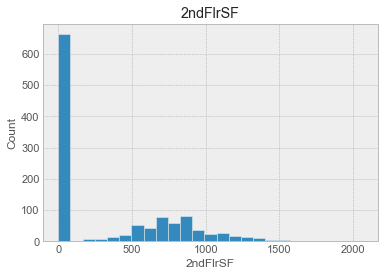

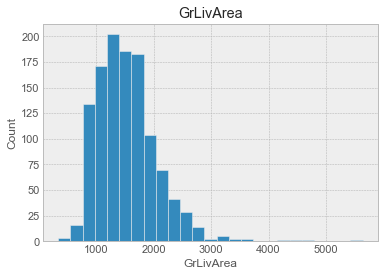

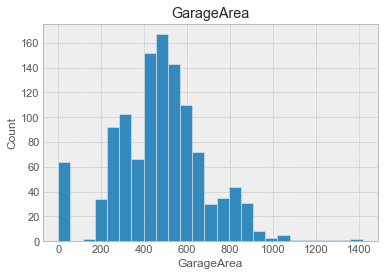

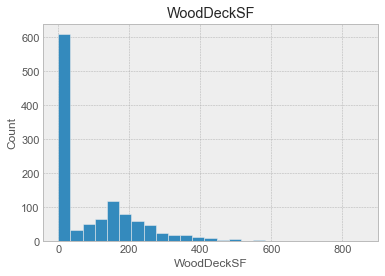

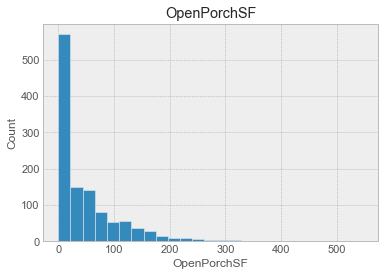

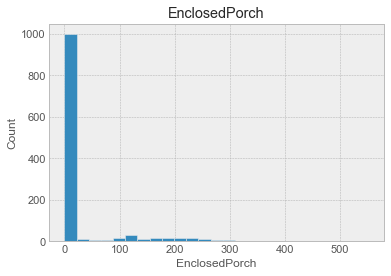

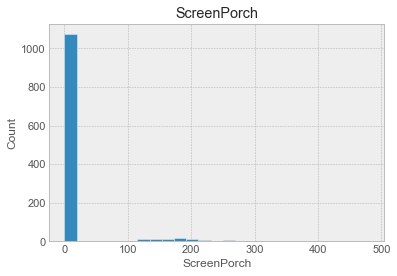

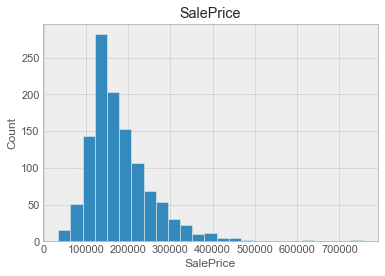

In [39]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In Histogram X axis, we can see many range of values

Here Most of the continous values are not follwed Normal distribution, only last and few feature looks normally distributed ,

Normally in Linear regression problem, if data is not ND and skewed more, then we apply Log transformation to convert to Normal distribution

### LOG NORMAL DISTRIBUTION

logarithmic transformation - ON Continuous Variables and plotting below 2 plot

1. Histogram "Continous feature"

2. Scatterplot "Continous feature" VS "Salesprice"

Continous feature has huge range of values, so applyng Log function to reduce the range and shrink it and makes normal distributed

Here we are not changing original data with log, just applying in copied data and visualizing i

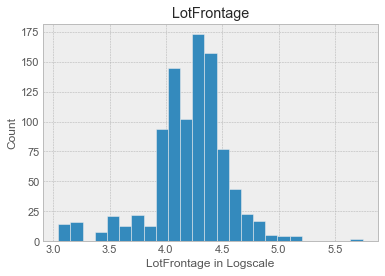

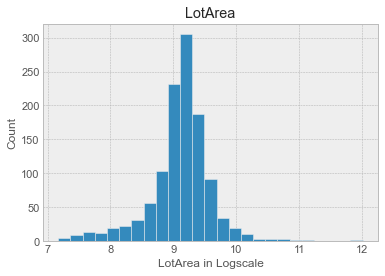

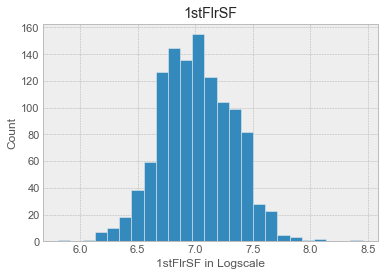

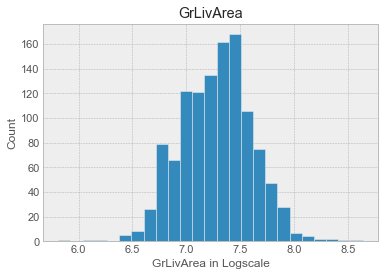

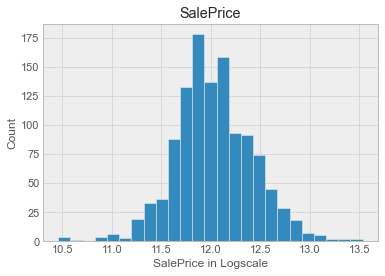

In [41]:
## We will be using logarithmic transformation  - HISTOGRAM PLOT
# In log func Log10 0 = Not Defined and lne (0) = Not defined , so we are just "pass" and not plotting anything

for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature + " in Logscale")
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

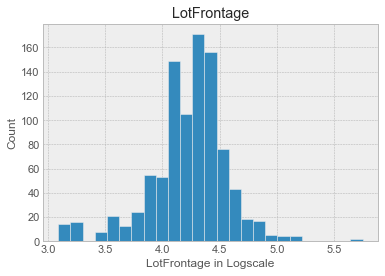

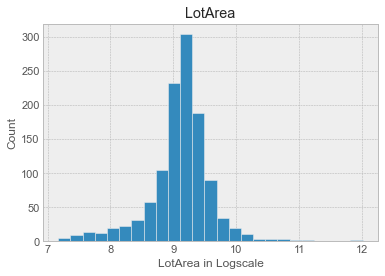

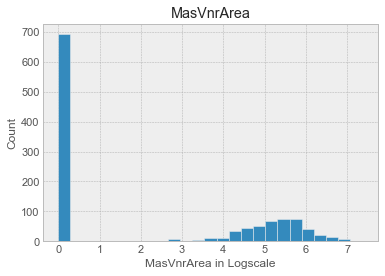

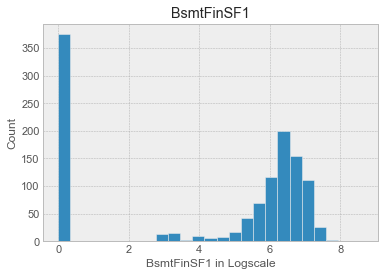

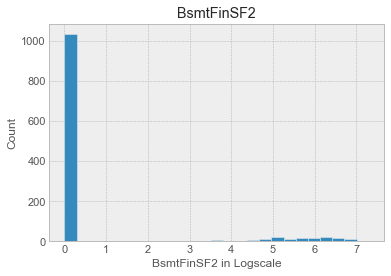

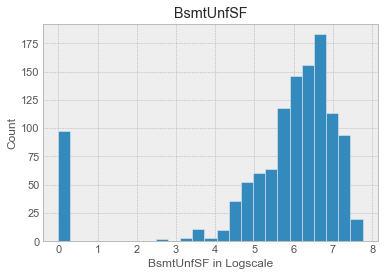

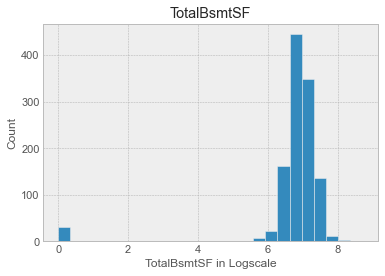

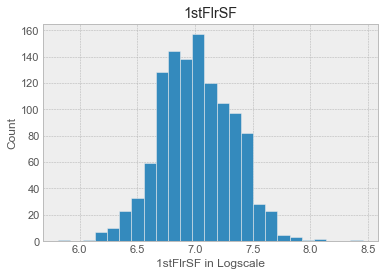

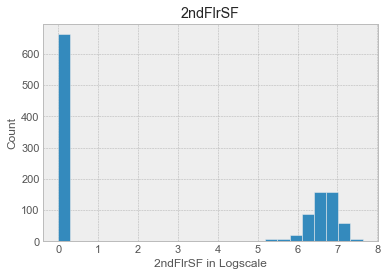

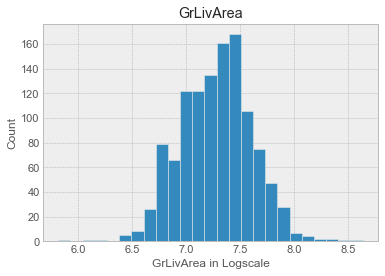

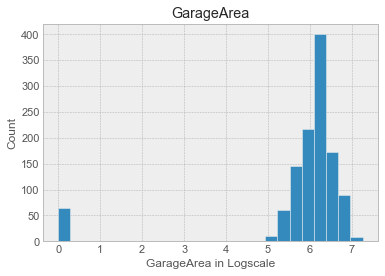

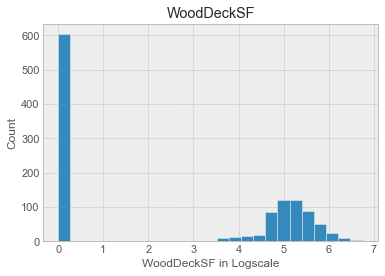

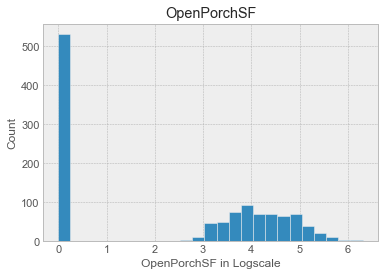

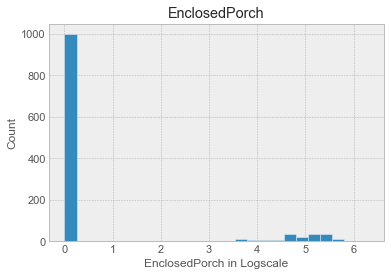

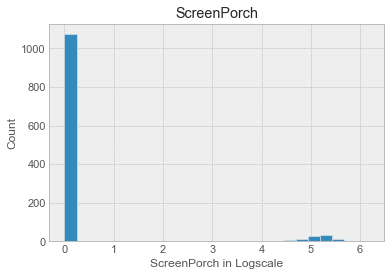

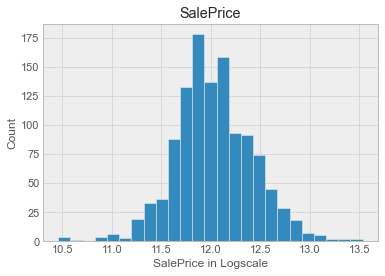

In [42]:
## We will be using logarithmic transformation log1p - HISTOGRAM PLOT
# In log1p = LOG(P+1)  --> Here we can use for data which has 0 also

for feature in continuous_feature:
    data=train.copy()
    data[feature]=np.log1p(data[feature])
    data[feature].hist(bins=25)
    plt.xlabel(feature + " in Logscale")
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Here after doing the Logscale, all continous value looks like follows Normal Distribution.

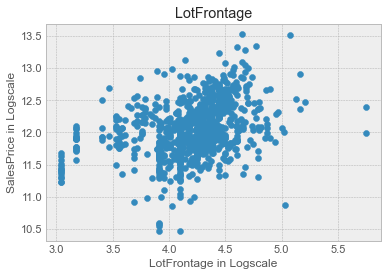

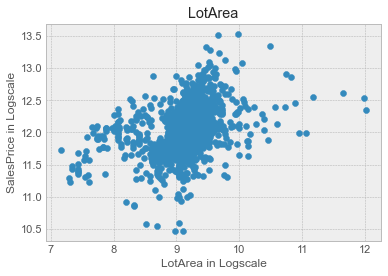

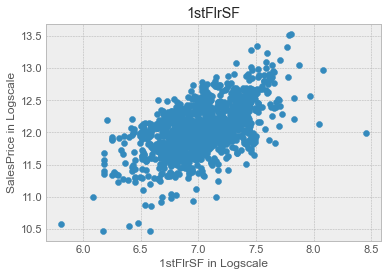

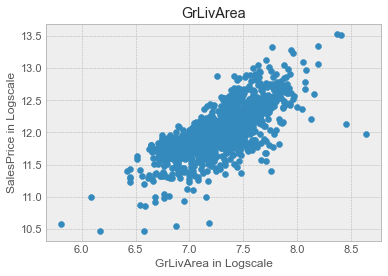

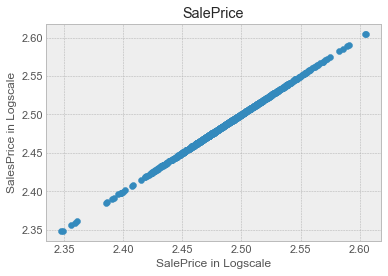

In [43]:
## We will be using logarithmic transformation  - SCATTER PLOT
# In log func Log10 0 = Not Defined and lne (0) = Not defined , so we are just "pass" and not plotting anything

for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature + " in Logscale")
        plt.ylabel('SalesPrice in Logscale')
        plt.title(feature)
        plt.show()

Here we can see the distribution of Continuous data with respect to the sales values and we can see that there are some outliers present.

## Categorical Variables

In [44]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [45]:
train[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      NPkVill       Norm  ...     Attchd          RFn         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf         TA         TA   
2      NoRidge       Norm  ...     Attchd          Unf         TA         TA   
3       NWAmes       Norm  ...     Attchd          RFn         TA         TA   
4       NWAmes       Norm  ...     Attchd          Fin         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y    NaN    NaN         NaN       WD        Normal  
1          Y    NaN    NaN         NaN       WD        Normal  
2          Y    NaN    NaN         NaN       WD        Normal  
3          Y    NaN  MnPrv         NaN      COD        Normal  
4          Y    NaN    NaN         NaN       WD        Normal  

[5 rows x 43 columns]

## Cardinality of Categorical Variables

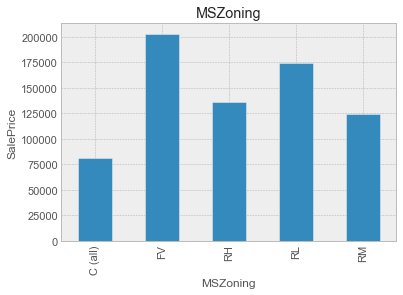

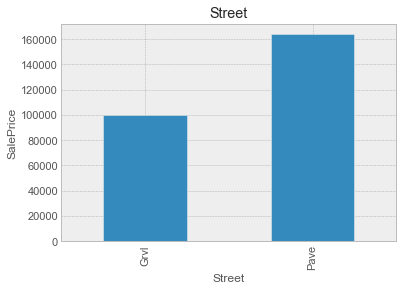

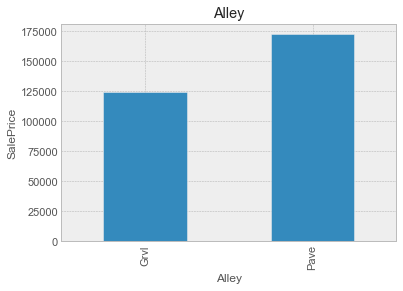

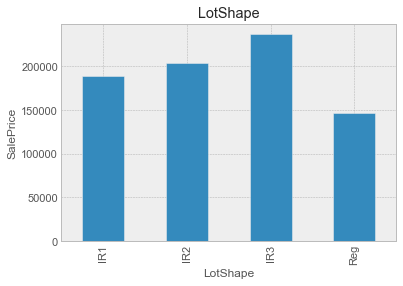

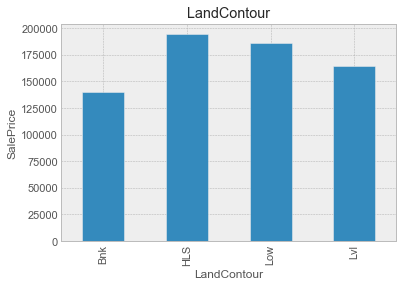

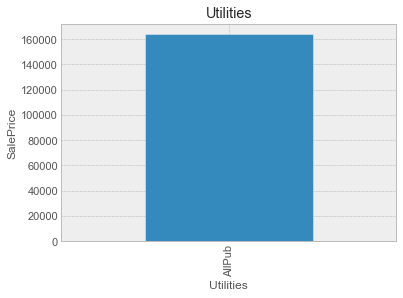

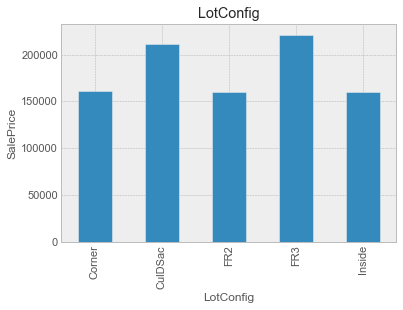

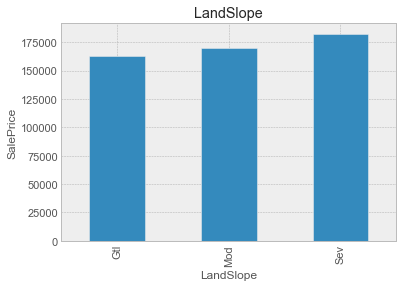

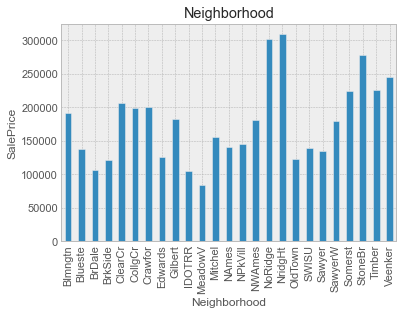

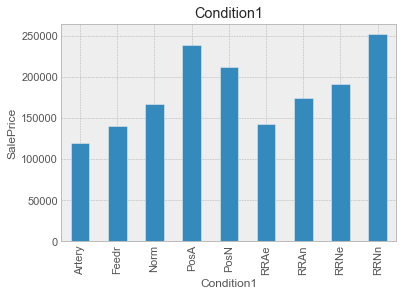

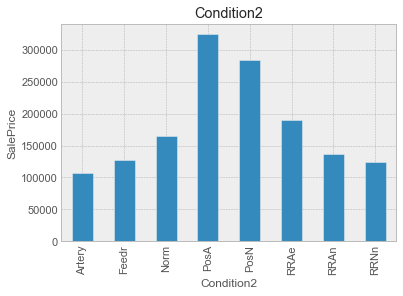

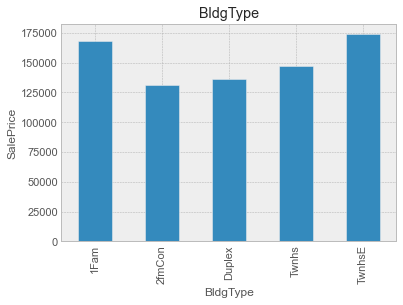

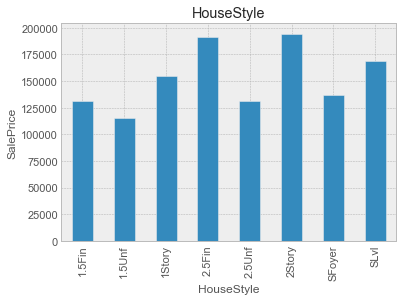

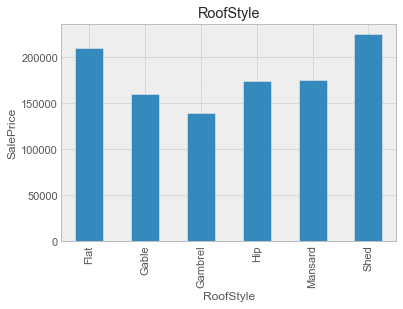

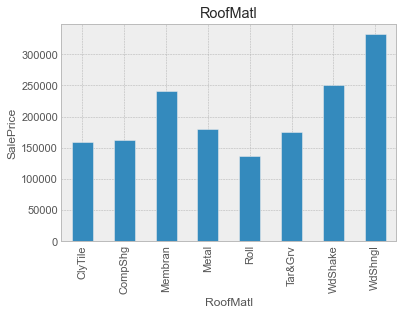

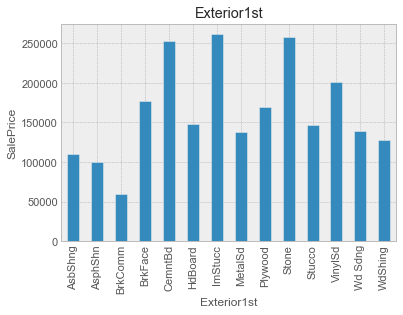

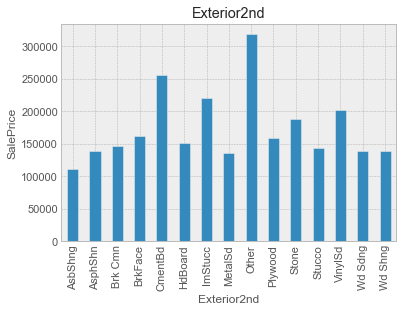

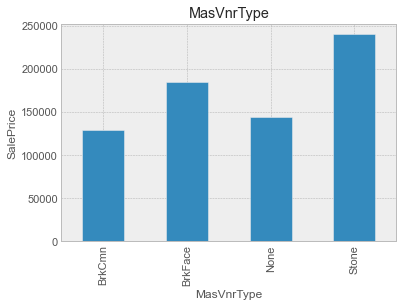

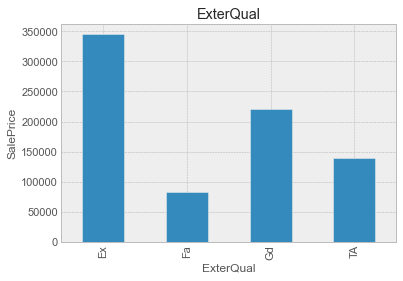

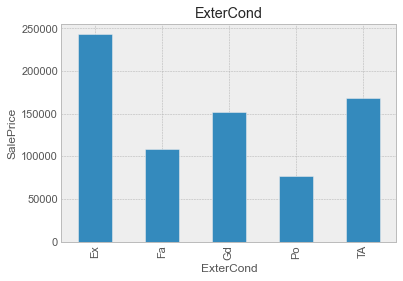

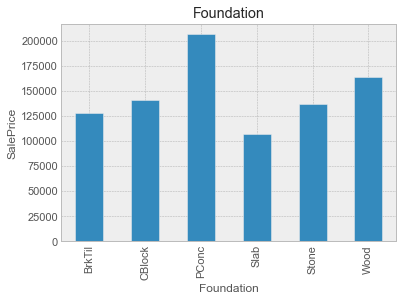

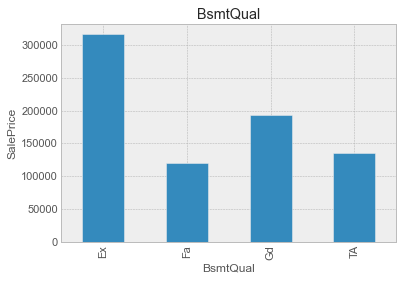

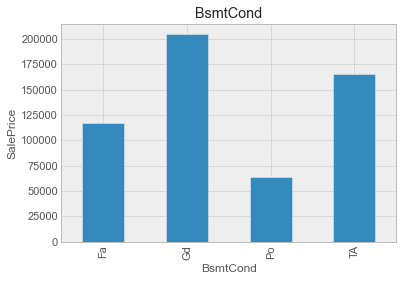

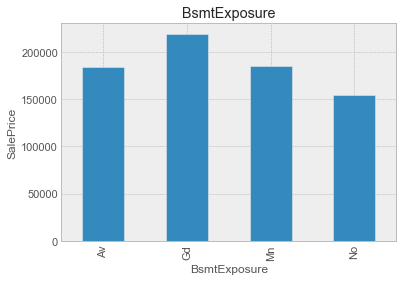

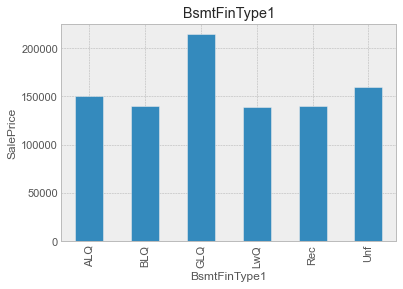

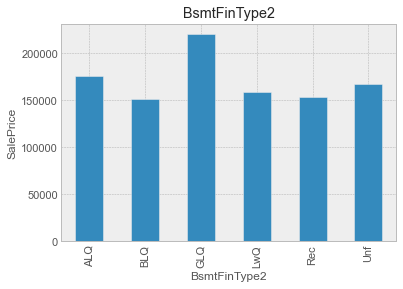

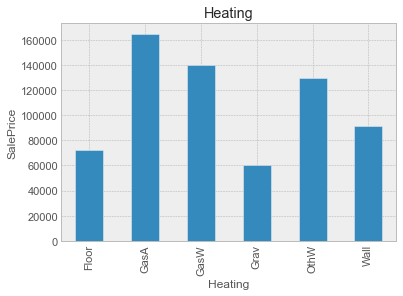

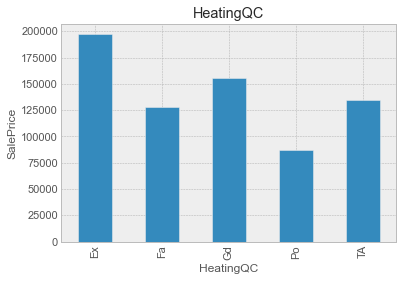

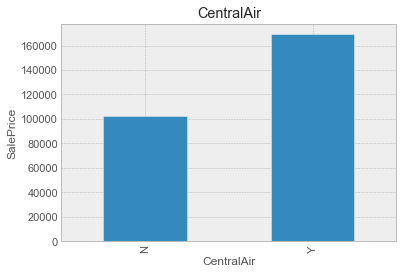

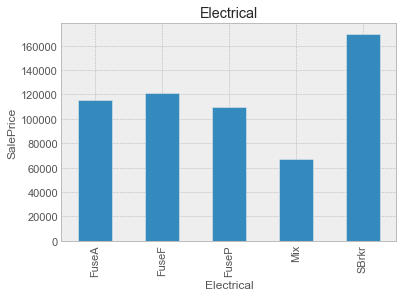

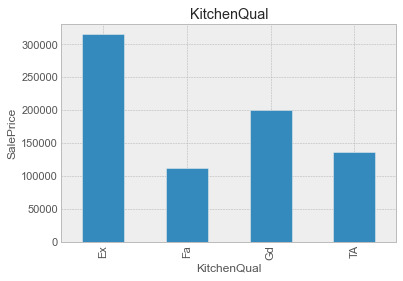

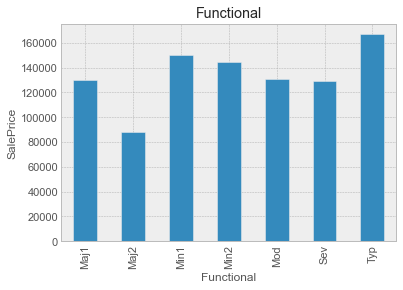

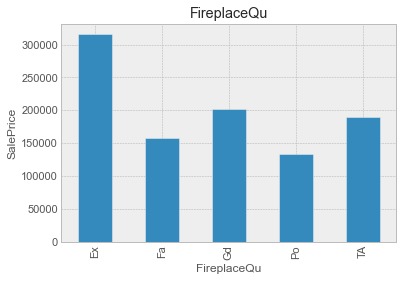

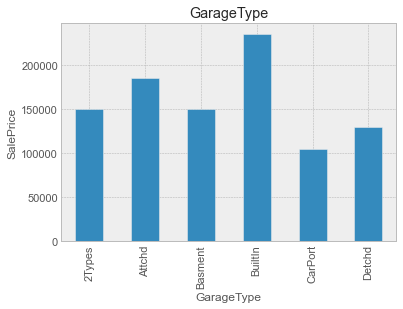

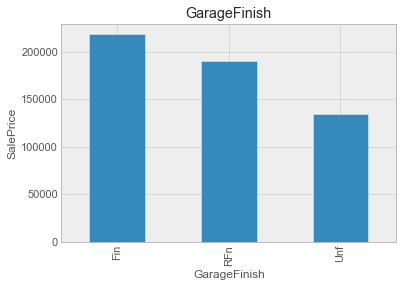

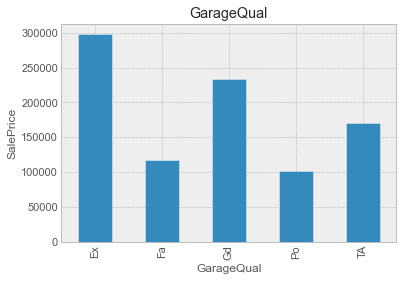

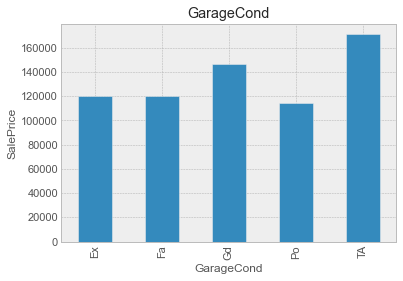

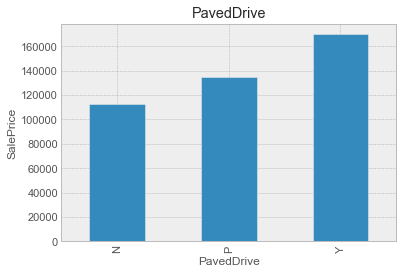

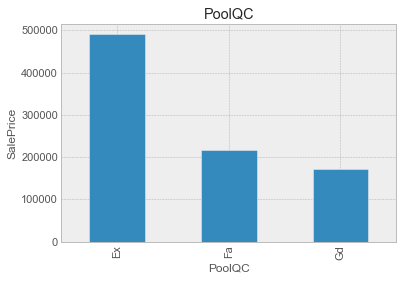

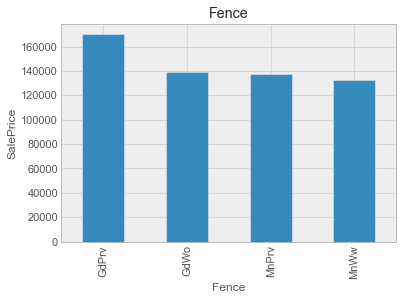

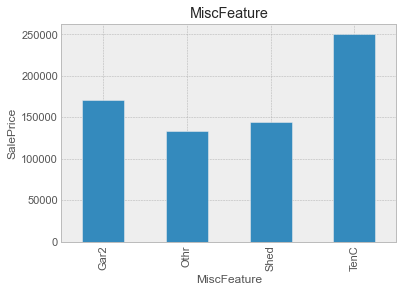

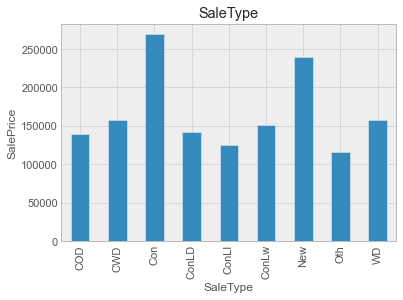

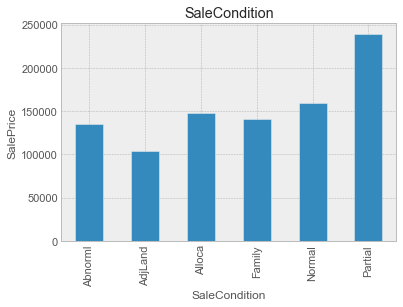

In [46]:
for feature in categorical_features:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Here we find the relationship between each categories of categorical variable and dependent feature SalesPrice

## Outliers

Using Boxplot
Apply Boxplot for all continuous_feature are check is there any outlier , This is not used for discrete variable

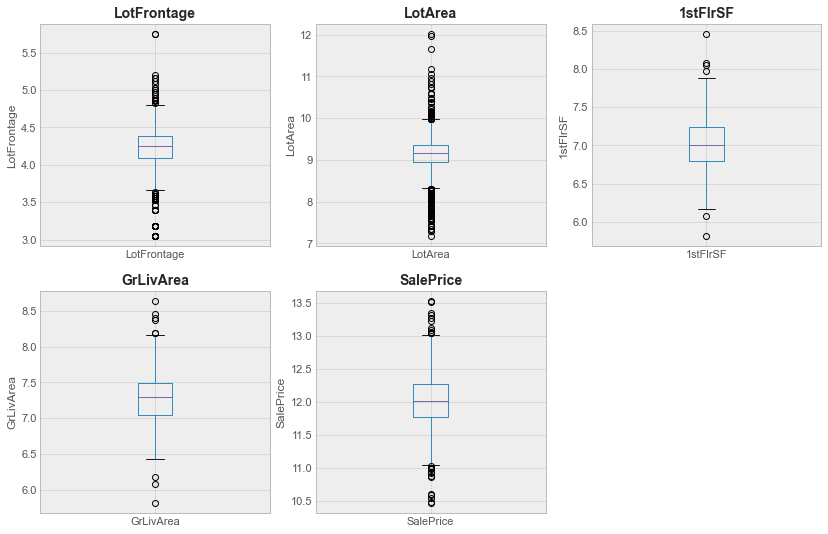

In [47]:
a = 2  # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(14,9))    
for feature in continuous_feature:
    data=train.copy()   
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(a, b, c)
        data[feature]=np.log(data[feature])
        plt.title('{}'.format(feature),fontsize=14,fontweight='bold')
        plt.ylabel(feature)
        data.boxplot(column=feature)
        c = c + 1
plt.show()

Here we can see that there are some outliers present in the continuous feature dataset.

## - Using Z-score

Here Z-score applied to see the outlier. If z-score>3 then its a outlier

In [48]:
outliers=[]
z_value=[]

# Create Function for Outlier detection by Z-test

def detect_outliers(data):
    
# This is  3rd STD threshold  
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        z_value.append(z_score)
        #print(z_score)
        # This Z value <-3 or >3 are outlier, so taken abs(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

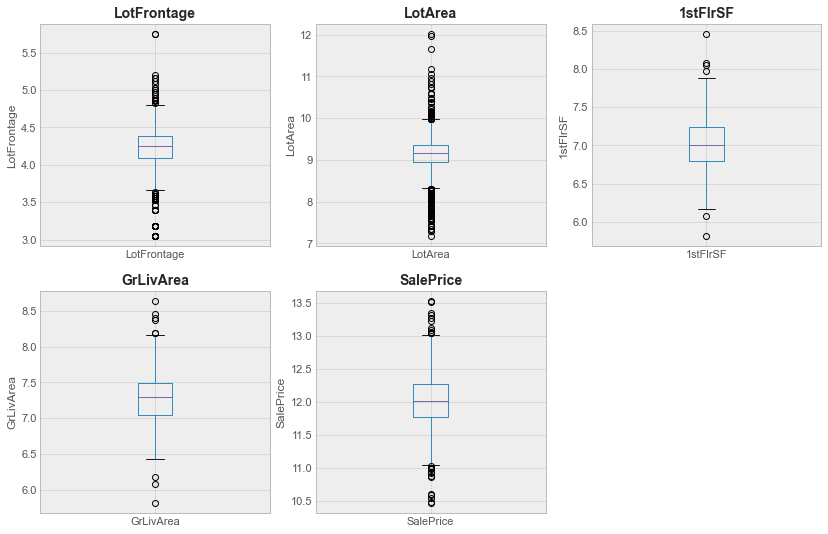

In [49]:
a = 2  # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,9))

    
for feature in continuous_feature:
    data=train.copy()
    # Call Function
    outlier = detect_outliers(data[feature])
    
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(a, b, c)
        data[feature]=np.log(data[feature])
        plt.title('{}'.format(feature),fontsize=14,fontweight='bold')
        plt.ylabel(feature)
        data.boxplot(column=feature)
        c = c + 1
plt.show()

--> In SalesPrice vs LotFrontage plot:

We can see at the bottom right two with extremely large LotFrontage that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.
--> In SalesPrice vs 1stFlrSf plot:

We can see at the bottom right one with extremely large 1stFlrSf that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.
--> In SalesPrice vs GrLivArea plot:

We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.
These 2 we will remove
-- These 2 we can handle in below FE part

# Feature Engineering

### Outlier handling

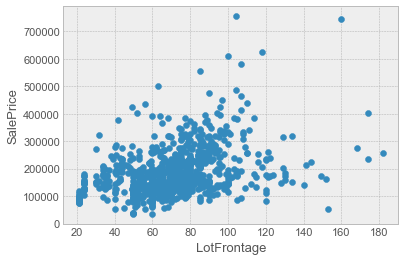

In [50]:
#Deleting outliers in LotFrontage
train = train.drop(train[(train['LotFrontage']>300) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['LotFrontage'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

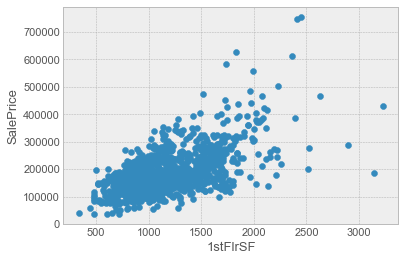

In [51]:
#Deleting outliers in 1stFlrSf
train = train.drop(train[(train['1stFlrSF']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['1stFlrSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

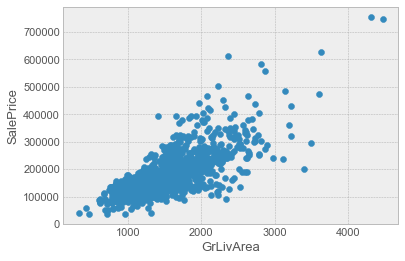

In [52]:
#Deleting outliers in GrLivArea
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Outliers removal is not always safe. We decided to delete these two as they are very huge and really bad ( extremely large areas for very low prices).

There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why , instead of removing them all, we will just manage to make some of our models robust on them.

## Filling the missing columns values

In [53]:
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train.select_dtypes('object').columns.tolist()
numeric_cols.pop()

'SalePrice'

## Few Missing values are valid values


PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

MiscFeature : data description says NA means "no misc feature"

Alley : data description says NA means "no alley access"

Fence : data description says NA means "no fence"

FireplaceQu : data description says NA means "no fireplace"
    
GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None/Missing value
    
GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
    
BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
    
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement
    .
MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
    
MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL

## PoolQC

PoolQC: Pool quality

Ex  -->  Excellent

Gd  -->  Good

TA  -->  Average/Typical

Fa  -->  Fair

NA  -->  No Pool
The fact that the Field PoolQC has a lot of NAN values, has to got the fact that it signifies these houses don't have Pools.

In [55]:
train['PoolQC'] = np.where(train['PoolQC'].isna(), 'None', train['PoolQC'])
test['PoolQC'] = np.where(test['PoolQC'].isna(), 'None', test['PoolQC'])

## MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories

Elev  -->  Elevator
Gar2  -->  2nd Garage (if not described in garage section)   
Othr  -->  Other   
Shed  -->  Shed (over 100 SF)   
TenC  -->  Tennis Court   
NA    -->  None

In [56]:
train['MiscFeature'] = np.where(train['MiscFeature'].isna(), 'None', train['MiscFeature'])
test['MiscFeature'] = np.where(test['MiscFeature'].isna(), 'None', test['MiscFeature'])

## Alley

Alley: Type of alley access to property

Grvl -->   Gravel
Pave -->   Paved
NA   -->  No alley access

In [57]:
train['Alley'] = np.where(train['Alley'].isna(), 'None', train['Alley'])
test['Alley'] = np.where(test['Alley'].isna(), 'None', test['Alley'])

## Fence

Fence: Fence quality

GdPrv -->   Good Privacy
MnPrv  -->  Minimum Privacy
GdWo  -->  Good Wood
MnWw  -->  Minimum Wood/Wire
NA  -->  No Fence

In [59]:
train['Fence'] = np.where(train['Fence'].isna(), 'None', train['Fence'])
test['Fence'] = np.where(test['Fence'].isna(), 'None', test['Fence'])

## FireplaceQu

FireplaceQu: Fireplace quality

Ex  -->  Excellent - Exceptional Masonry Fireplace
Gd  -->  Good - Masonry Fireplace in main level
TA  -->  Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
Fa  -->  Fair - Prefabricated Fireplace in basement
Po  -->  Poor - Ben Franklin Stove
NA  -->  No Fireplace 

In [61]:
train['FireplaceQu'] = np.where(train['FireplaceQu'].isna(), 'None', train['FireplaceQu'])
test['FireplaceQu'] = np.where(test['FireplaceQu'].isna(), 'None', test['FireplaceQu'])

## GarageFinish

GarageFinish: Interior finish of the garage

Fin -->   Finished
RFn -->   Rough Finished    
Unf -->   Unfinished
NA  -->   No Garage

In [62]:
train['GarageFinish'] = np.where(train['GarageFinish'].isna(), 'None', train['GarageFinish'])
test['GarageFinish'] = np.where(test['GarageFinish'].isna(), 'None', test['GarageFinish'])

## GarageCond

GarageCond: Garage condition

Ex -->   Excellent
Gd -->   Good
TA -->   Typical/Average
Fa -->   Fair
Po -->   Poor
NA -->   No Garage

In [64]:
train['GarageCond'] = np.where(train['GarageCond'].isna(), 'None', train['GarageCond'])
test['GarageCond'] = np.where(test['GarageCond'].isna(), 'None', test['GarageCond'])

## GarageType

GarageType: Garage location

2Types  -->  More than one type of garage
Attchd  -->  Attached to home
Basment -->  Basement Garage
BuiltIn -->  Built-In (Garage part of house - typically has room above garage)
CarPort -->  Car Port
Detchd  -->  Detached from home
NA      -->  No Garage

In [66]:
train['GarageType'] = np.where(train['GarageType'].isna(), 'None', train['GarageType'])
test['GarageType'] = np.where(test['GarageType'].isna(), 'None', test['GarageType'])

## GarageQual

GarageQual: Garage quality

Ex -->   Excellent
Gd -->   Good
TA -->   Typical/Average
Fa -->   Fair
Po -->   Poor
NA -->   No Garage

In [67]:
train['GarageQual'] = np.where(train['GarageQual'].isna(), 'None', train['GarageQual'])
test['GarageQual'] = np.where(test['GarageQual'].isna(), 'None', test['GarageQual'])

## BsmtFinType2

BsmtFinType2: Rating of basement finished area (if multiple types)

GLQ -->   Good Living Quarters
ALQ -->   Average Living Quarters
BLQ -->   Below Average Living Quarters    
Rec -->   Average Rec Room
LwQ -->   Low Quality
Unf -->   Unfinshed
NA  -->   No Basement

In [70]:
train['BsmtFinType2'] = np.where(train['BsmtFinType2'].isna(), 'None', train['BsmtFinType2'])
test['BsmtFinType2'] = np.where(test['BsmtFinType2'].isna(), 'None', test['BsmtFinType2'])

## BsmtQual

BsmtQual: Evaluates the height of the basement

Ex -->   Excellent (100+ inches)    
Gd -->   Good (90-99 inches)
TA -->   Typical (80-89 inches)
Fa -->   Fair (70-79 inches)
Po -->   Poor (<70 inches
NA -->   No Basement

In [71]:
train['BsmtQual'] = np.where(train['BsmtQual'].isna(), 'None', train['BsmtQual'])
test['BsmtQual'] = np.where(test['BsmtQual'].isna(), 'None', test['BsmtQual'])

## BsmtCond

BsmtCond: Evaluates the general condition of the basement

Ex  -->  Excellent
Gd  -->  Good
TA  -->  Typical - slight dampness allowed
Fa  -->  Fair - dampness or some cracking or settling
Po  -->  Poor - Severe cracking, settling, or wetness
NA  -->  No Basement

In [74]:
train['BsmtCond'] = np.where(train['BsmtCond'].isna(), 'None', train['BsmtCond'])
test['BsmtCond'] = np.where(test['BsmtCond'].isna(), 'None', test['BsmtCond'])

## BsmtExposure

BsmtExposure: Refers to walkout or garden level walls

Gd    Good Exposure
Av    Average Exposure (split levels or foyers typically score average or above)    
Mn    Mimimum Exposure
No    No Exposure
NA    No Basement

In [75]:
train['BsmtExposure'] = np.where(train['BsmtExposure'].isna(), 'None', train['BsmtExposure'])
test['BsmtExposure'] = np.where(test['BsmtExposure'].isna(), 'None', test['BsmtExposure'])

## BsmtFinType1

BsmtFinType1: Rating of basement finished area

GLQ    Good Living Quarters
ALQ    Average Living Quarters
BLQ    Below Average Living Quarters    
Rec    Average Rec Room
LwQ    Low Quality
Unf    Unfinshed
NA    No Basement

In [76]:
train['BsmtFinType1'] = np.where(train['BsmtFinType1'].isna(), 'None', train['BsmtFinType1'])
test['BsmtFinType1'] = np.where(test['BsmtFinType1'].isna(), 'None', test['BsmtFinType1'])

## MasVnrType

MasVnrType: Masonry veneer type

BrkCmn    Brick Common
BrkFace   Brick Face
CBlock    Cinder Block
None      None
Stone     Stone

In [77]:
train['MasVnrType'] = np.where(train['MasVnrType'].isna(), 'None', train['MasVnrType'])
test['MasVnrType'] = np.where(test['MasVnrType'].isna(), 'None', test['MasVnrType'])

In [80]:
for i in categorical_cols:
    train[i].fillna(train[i].mode()[0], inplace=True)
    test[i].fillna(test[i].mode()[0], inplace=True)

In [81]:
for i in numeric_cols:
    random = train[i].dropna().sample(train[i].isna().sum())
    random.index = train[train[i].isna()].index
    train[i].fillna(random, inplace=True)
    ## test
    random = test[i].dropna().sample(test[i].isna().sum())
    random.index = test[test[i].isna()].index
    test[i].fillna(random, inplace=True)

In [82]:
train.isna().sum().sort_values(ascending=True).head()

MSSubClass     0
GarageType     0
FireplaceQu    0
Fireplaces     0
Functional     0
dtype: int64

In [83]:
test.isna().sum().sort_values(ascending=True).head()

MSSubClass      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
dtype: int64

Here we can see that now we have Zero null values present in the datasets

## Sale Prices

Lets check the correlation between the independent columns with the dependent columni.e. SalePrice

In [84]:
pd.DataFrame(train.corr()['SalePrice'].sort_values(ascending=False).head(15))

SalePrice
SalePrice      1.000000
OverallQual    0.795059
GrLivArea      0.740059
TotalBsmtSF    0.642191
GarageCars     0.629097
GarageArea     0.626219
1stFlrSF       0.618620
FullBath       0.556640
TotRmsAbvGrd   0.533211
YearBuilt      0.515715
YearRemodAdd   0.508289
MasVnrArea     0.471372
Fireplaces     0.462995
GarageYrBlt    0.454108
BsmtFinSF1     0.389947

Here we can see that the OverallQual and GrLivArea are highly correlated with the target column.

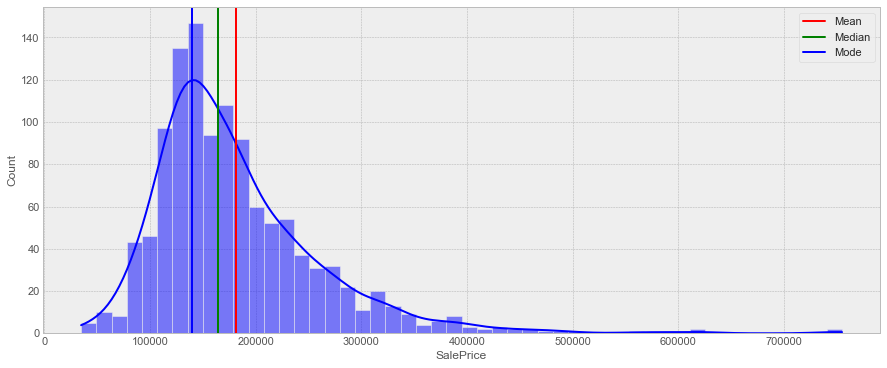

In [85]:
plt.figure(figsize=(15, 6))
sns.histplot(x=train['SalePrice'], kde=True, bins=50)
plt.axvline(x=train['SalePrice'].mean(), color='red', label='Mean')
plt.axvline(x=train['SalePrice'].median(), color='green', label='Median')
plt.axvline(x=train['SalePrice'].mode().mean(), color='blue', label='Mode')
plt.legend()
plt.show()

Here We found the data skewed distribution, so we will applied Lognormal distribution to OP and made ND

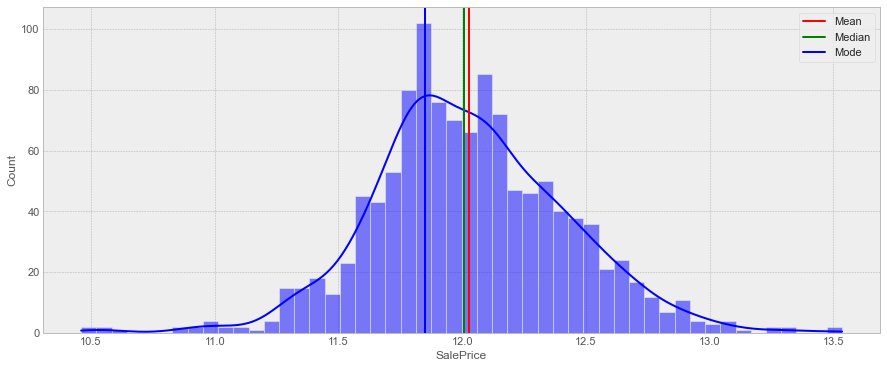

In [86]:
plt.figure(figsize=(15, 6))
sns.histplot(x=np.log1p(train['SalePrice']), kde=True, bins=50)
plt.axvline(x=np.log1p(train['SalePrice']).mean(), color='red', label='Mean')
plt.axvline(x=np.log1p(train['SalePrice']).median(), color='green', label='Median')
plt.axvline(x=np.log1p(train['SalePrice']).mode().mean(), color='blue', label='Mode')
plt.legend()
plt.show()

With the help of the log function we remove the skewness from the data and now the data is normally distributed.

In [87]:
train['SalePrice'] = np.log1p(train['SalePrice'])

A non normal positively skewed random variable can be converted into a normally distributed random variable by applying log1p transformation.

Whenever you have positively skewed data, we apply log transformation to bring them to same scale. Eg: if data was 1, 10,1000,10000 etc then applying log would change them to 0,1,3,4.

However, remember that log only works when all elements are greater than zero. In our case data is positively skewed and also contains 0 then we can not apply log transformation directly

and hence we add 1 to every element and then apply log i.e. log(1+x) which in numpy can be done by log1p (meaning log 1 plus x)

To check whether the log1p transformation worked i.e. our variable actually became normal after applying log1p, we run any statistical tests (Anderson Darling Test, KS Test etc) or simply check the probability plot.

If the data is distributed along the diagonal line of the plot then it means that the data is normal and the transformation worked as expected.


 mu = 12.03 and sigma = 0.40



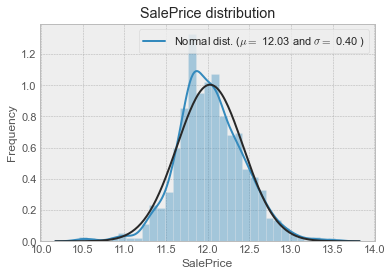

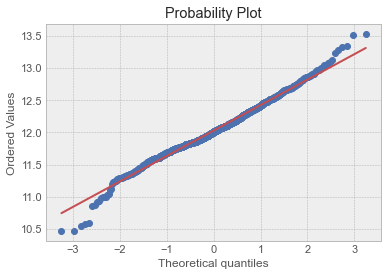

In [88]:
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

After Log normal distribution data follows proper ND

## GrLivArea

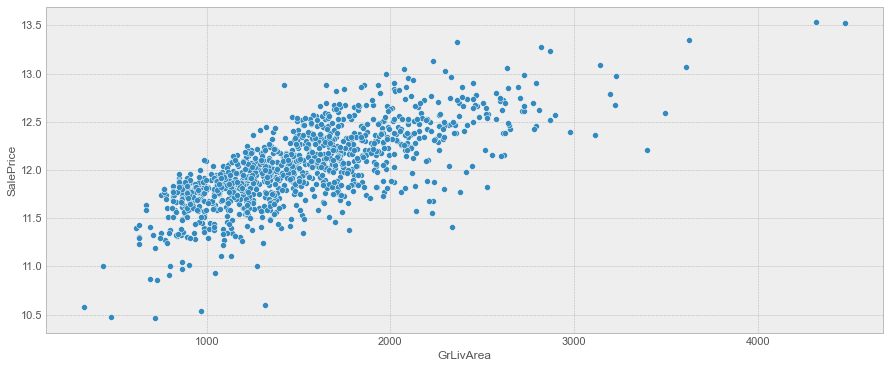

In [89]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

In [90]:
train = train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000))]

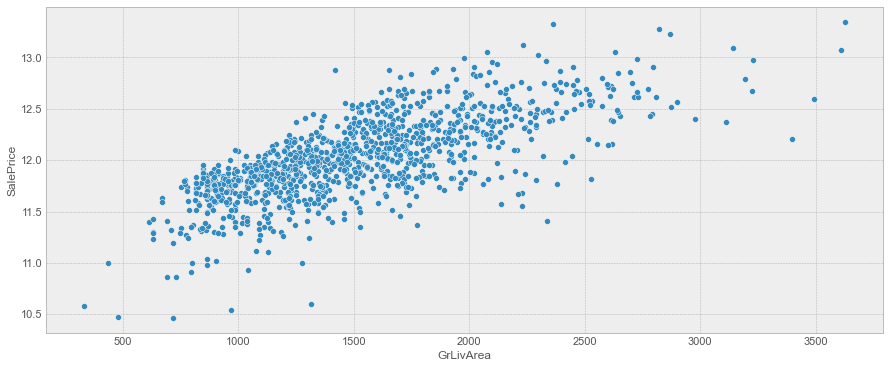

In [91]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

Here we can see that some outliers are present when we draw the relation between the SalePrice and GrLivArea.

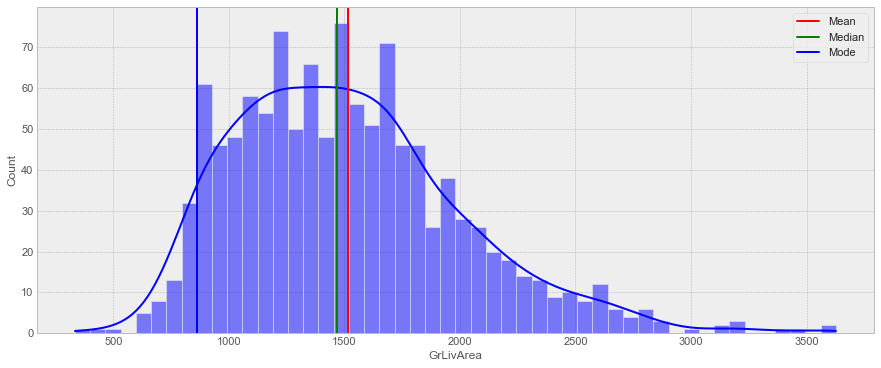

In [92]:
plt.figure(figsize=(15, 6))
sns.histplot(x=train['GrLivArea'], kde=True, bins=50)
plt.axvline(x=train['GrLivArea'].mean(), color='red', label='Mean')
plt.axvline(x=train['GrLivArea'].median(), color='green', label='Median')
plt.axvline(x=train['GrLivArea'].mode().mean(), color='blue', label='Mode')
plt.legend()
plt.show()

Here with the help of Histogram we can see the distribution of the GrLivArea, and we can see that the mean is greater than the median and mode that means the distribution is right skewed.

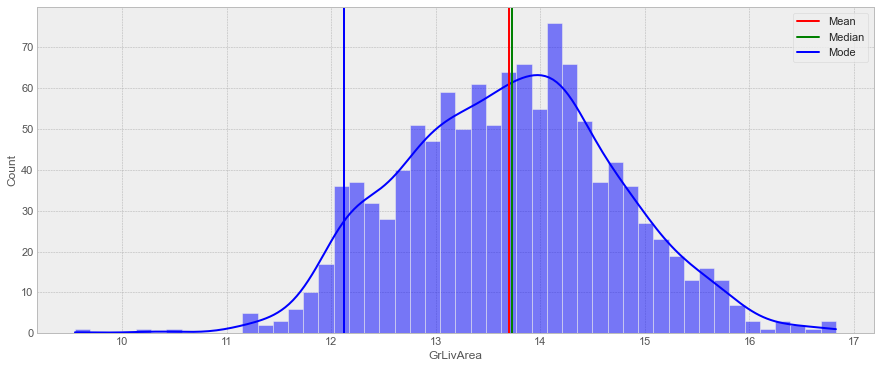

In [93]:
X = boxcox1p(train['GrLivArea'], boxcox_normmax(train['GrLivArea'] + 1))
plt.figure(figsize=(15, 6))
sns.histplot(x=X, kde=True, bins=50)
plt.axvline(x=X.mean(), color='red', label='Mean')
plt.axvline(x=X.median(), color='green', label='Median')
plt.axvline(x=X.mode().mean(), color='blue', label='Mode')
plt.legend()
plt.show()

Here by using boxcox we remove the right skewness of the distribution in GrlivArea as now Median Mean are close and Median is not very large than median. So, here we can see that data is normally distributed.

In [95]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [96]:
# Before applying Temporal handling we will replace NULL for this value with median, else it creates problem later
for feature in year_feature:
    ## We will replace by using median since there are outliers
    median_value=train[feature].median()
    print(median_value)
    ## Here created a new feature to capture nan values like indicator, if 1 then null value, if 0 then non null
   # dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    train[feature].fillna(median_value,inplace=True)
    
train[year_feature].isnull().sum()

1972.0
1993.0
1979.0
2008.0


YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
YrSold          0
dtype: int64

In [97]:
#For test
# Before applying Temporal handling we will replace NULL for this value with median, else it creates problem later
for feature in year_feature:
    ## We will replace by using median since there are outliers
    median_value=train[feature].median()
    print(median_value)
    ## Here created a new feature to capture nan values like indicator, if 1 then null value, if 0 then non null
   # dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    test[feature].fillna(median_value,inplace=True)
    
test[year_feature].isnull().sum()

1972.0
1993.0
1979.0
2008.0


YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
YrSold          0
dtype: int64

## Temporal variables

Here we are converting Temporal variables like year field. Here we are converting to number by substracting each year by YrSold

So this represents values in no of years

In [98]:
#Training set
## Temporal Variables (Date Time Variables)

for feature in year_feature:
    
    if feature != 'YrSold' :
       
        train[feature]=train['YrSold']-train[feature]
        
#Testing set
## Temporal Variables (Date Time Variables)

for feature in year_feature:
    
    if feature != 'YrSold' :
       
        test[feature]=test['YrSold']-test[feature]

In [99]:
#Training
train.loc[:,['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0         31            31         30.0    2007
1         37            37         37.0    2007
2         11            10         10.0    2007
3         33            33         33.0    2010
4         32             9         32.0    2009

In [100]:
#Testing
test.loc[:,['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0          2             1          2.0    2007
1         25            25         25.0    2009
2          8             8          8.0    2009
3         68            59         68.0    2009
4          1             1          1.0    2008

In [101]:
#Training data
print(train.GarageYrBlt.isnull().sum())
#Testing Data
print(test.GarageYrBlt.isnull().sum())

0
0


In [102]:
train[train.GarageYrBlt.isnull()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]

In [103]:
test[test.GarageYrBlt.isnull()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 79 columns]

## Convert Categorical variable to numerical data

In [104]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train[categorical_cols])

In [105]:
encoded_cols = encoder.get_feature_names(categorical_cols)

In [106]:
train[encoded_cols] = encoder.transform(train[categorical_cols])
train.drop(categorical_cols, axis=1, inplace=True)


In [107]:
test[encoded_cols] = encoder.transform(test[categorical_cols])
test.drop(categorical_cols, axis=1, inplace=True)

In [108]:
df = pd.concat((train.drop('SalePrice', axis=1), test)).reset_index(drop=True)

In [109]:
skewness = df[numeric_cols].skew().sort_values(ascending=True)
skewness = skewness[abs(skewness) > 0.75]
skewness

2ndFlrSF          0.776812
GrLivArea         0.837349
1stFlrSF          0.866948
BsmtUnfSF         0.920885
MSSubClass        1.405641
WoodDeckSF        1.550381
OpenPorchSF       2.339035
MasVnrArea        2.638105
EnclosedPorch     3.083098
ScreenPorch       4.113996
BsmtHalfBath      4.127311
BsmtFinSF2        4.246917
KitchenAbvGr      4.479607
LowQualFinSF      8.995367
3SsnPorch        10.286243
LotArea          12.622793
PoolArea         17.516549
MiscVal          24.435000
dtype: float64

In [110]:
for i in skewness.index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i]+1))

In [111]:
df[skewness.index].skew().sort_values(ascending=False)

PoolArea         17.110492
3SsnPorch         7.738449
LowQualFinSF      7.386959
MiscVal           5.195643
BsmtHalfBath      3.949859
KitchenAbvGr      3.949508
ScreenPorch       3.324950
BsmtFinSF2        2.641948
EnclosedPorch     2.282834
MasVnrArea        0.949461
2ndFlrSF          0.879315
WoodDeckSF        0.780110
OpenPorchSF       0.625840
MSSubClass        0.432497
BsmtUnfSF         0.053258
GrLivArea         0.013811
1stFlrSF          0.000850
LotArea          -0.199529
dtype: float64

In [112]:
df.shape

(1455, 298)

In [113]:
df

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       7.891062         43.0  8.394600            6            5         31   
1       4.142653         95.0  9.531981            8            6         37   
2       6.272781         92.0  9.075655            7            5         11   
3       4.142653        105.0  9.240339            6            6         33   
4       4.142653         83.0  9.578004            6            7         32   
...          ...          ...       ...          ...          ...        ...   
1450    4.142653         78.0  9.103295            8            5          1   
1451    4.142653         57.0  9.007117            5            5         14   
1452    4.142653         66.0  9.197208            6            7         40   
1453    5.883824         50.0  8.408733            6            7         59   
1454    8.631674         21.0  7.491548            6            5         33   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0               31    0.000000         120     0.00000  ...             0.0   
1               37    0.000000         351    13.03815  ...             0.0   
2               10    0.000000         862     0.00000  ...             0.0   
3               33   30.210197         705     0.00000  ...             0.0   
4                9   16.121400        1246     0.00000  ...             0.0   
...            ...         ...         ...         ...  ...             ...   
1450             1   29.861900          33     0.00000  ...             0.0   
1451            13    0.000000         686     0.00000  ...             0.0   
1452            40   19.128327         578     0.00000  ...             0.0   
1453            56    0.000000         399     0.00000  ...             0.0   
1454            33   28.038536         309     0.00000  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0              0.0           0.0          1.0                    0.0   
1              0.0           0.0          1.0                    0.0   
2              0.0           0.0          1.0                    0.0   
3              0.0           0.0          0.0                    0.0   
4              0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1450           0.0           0.0          1.0                    0.0   
1451           0.0           0.0          1.0                    0.0   
1452           0.0           0.0          1.0                    0.0   
1453           0.0           0.0          1.0                    0.0   
1454           0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1450                    0.0                   0.0                   0.0   
1451                    0.0                   0.0                   0.0   
1452                    0.0                   0.0                   0.0   
1453                    0.0                   0.0                   0.0   
1454                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      1.0                    0.0  
4                      1.0                    0.0  
...               

In [114]:
y = train['SalePrice']
X = df.iloc[:len(train), :]
test = df.iloc[len(train):, :]

## Models

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [116]:
X_train

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
506     5.883824         79.0   9.032763            5            5         66   
1146    6.272781         75.0   8.874031            6            5          7   
200     4.142653         70.0   8.913872            5            6         53   
479     4.142653         85.0   9.142690            7            5         37   
65      6.272781         74.0   8.962882            9            5          5   
...          ...          ...        ...          ...          ...        ...   
1033    6.272781         79.0   9.118233            6            5         12   
763     4.142653         70.0   8.991740            7            5          6   
835     6.272781        118.0  10.320288           10            5         11   
559     4.142653         49.0   9.799365            8            5          1   
684     7.891062         76.0   7.873165            6            5         12   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
506             57    0.000000         368    5.329481  ...             0.0   
1146             7    0.000000           0    0.000000  ...             0.0   
200             53    0.000000         922    0.000000  ...             0.0   
479             37    0.000000         778    0.000000  ...             0.0   
65               4   20.852552        1170    0.000000  ...             0.0   
...            ...         ...         ...         ...  ...             ...   
1033            11    0.000000           0    0.000000  ...             0.0   
763              6   22.082712        1400    0.000000  ...             0.0   
835             10   48.630397        1387    0.000000  ...             0.0   
559              0    0.000000        1721    0.000000  ...             0.0   
684             11    0.000000        1003    0.000000  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
506            0.0           0.0          1.0                    0.0   
1146           0.0           0.0          1.0                    1.0   
200            0.0           0.0          1.0                    0.0   
479            0.0           0.0          1.0                    0.0   
65             0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1033           0.0           0.0          1.0                    0.0   
763            0.0           0.0          1.0                    0.0   
835            0.0           0.0          1.0                    0.0   
559            1.0           0.0          0.0                    0.0   
684            0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
506                     0.0                   0.0                   0.0   
1146                    0.0                   0.0                   0.0   
200                     0.0                   0.0                   0.0   
479                     0.0                   0.0                   0.0   
65                      0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1033                    0.0                   0.0                   0.0   
763                     0.0                   0.0                   0.0   
835                     0.0                   0.0                   0.0   
559                     0.0                   0.0                   0.0   
684                     0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
506                    1.0                    0.0  
1146                   0.0                    0.0  
200                    1.0                    0.0  
479                    1.0                    0.0  
65                     1.0                    0.0  
...   

In [117]:
X_test

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
915     6.272781         65.0  8.890425            7            5          4   
590     4.142653         60.0  8.763857            5            8         57   
108     7.891062         34.0  8.325356            8            5          1   
833     6.272781         57.0  8.972742            7            5         10   
1069    6.613246         60.0  9.043766            4            2        106   
...          ...          ...       ...          ...          ...        ...   
110     6.272781         70.0  9.464689            6            5         35   
878     4.142653         60.0  8.679151            5            9         26   
664     5.883824         60.0  9.114096            6            7        102   
431     4.142653         76.0  8.993876            6            6         50   
713     4.142653        100.0  9.627222            7            8         51   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
915              3    0.000000           0    0.000000  ...             0.0   
590              5    0.000000         398    8.130721  ...             0.0   
108              1   14.957919          24    0.000000  ...             0.0   
833              9    0.000000           0    0.000000  ...             0.0   
1069            56    0.000000           0    0.000000  ...             0.0   
...            ...         ...         ...         ...  ...             ...   
110             35   22.419188         416    0.000000  ...             0.0   
878              0    0.000000         641    0.000000  ...             0.0   
664             13    0.000000           0    0.000000  ...             0.0   
431             50    0.000000         662    0.000000  ...             0.0   
713              8    0.000000        1406    0.000000  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
915            0.0           0.0          1.0                    0.0   
590            0.0           0.0          1.0                    0.0   
108            0.0           0.0          1.0                    0.0   
833            0.0           0.0          1.0                    0.0   
1069           0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
110            0.0           0.0          1.0                    0.0   
878            0.0           0.0          1.0                    0.0   
664            0.0           0.0          1.0                    0.0   
431            0.0           0.0          1.0                    0.0   
713            0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
915                     0.0                   0.0                   0.0   
590                     0.0                   0.0                   0.0   
108                     0.0                   0.0                   0.0   
833                     0.0                   0.0                   0.0   
1069                    0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
110                     0.0                   0.0                   0.0   
878                     0.0                   0.0                   0.0   
664                     0.0                   0.0                   0.0   
431                     0.0                   0.0                   0.0   
713                     0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
915                    1.0                    0.0  
590                    1.0                    0.0  
108                    1.0                    0.0  
833                    1.0                    0.0  
1069                   1.0                    0.0  
...               

## Model Training

In [118]:
def evaluate(model, X_train, y_train, X_test, y_test):
    print('TRAIN')
    pred = model.predict(X_train)
    print(f'MEAN ABSOLUTE ERROR: {mean_absolute_error(y_train, pred)}')
    print(f'MEAN SQUARED ERROR: {mean_squared_error(y_train, pred)}')
    print(f'ROOT MEAN SQUARED ERROR: {np.sqrt(mean_squared_error(y_train, pred))}')
    print(f'R2 SCORE: {r2_score(y_train, pred)}')
    print('###############################')
    print('TEST')
    pred = model.predict(X_test)
    print(f'MEAN ABSOLUTE ERROR: {mean_absolute_error(y_test, pred)}')
    print(f'MEAN SQUARED ERROR: {mean_squared_error(y_test, pred)}')
    print(f'ROOT MEAN SQUARED ERROR: {np.sqrt(mean_squared_error(y_test, pred))}')
    print(f'R2 SCORE: {r2_score(y_test, pred)}')

## Linear Regression

In [119]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [120]:
evaluate(model, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.06023939142845611
MEAN SQUARED ERROR: 0.007010900795971557
ROOT MEAN SQUARED ERROR: 0.08373112202742512
R2 SCORE: 0.9546644018057527
###############################
TEST
MEAN ABSOLUTE ERROR: 0.08340277864931969
MEAN SQUARED ERROR: 0.014608828140696887
ROOT MEAN SQUARED ERROR: 0.12086698532145529
R2 SCORE: 0.9039135897344512


In [121]:
Lasso

sklearn.linear_model._coordinate_descent.Lasso

In [122]:
param_grid = {
    'alpha': [0.1, 0.01, 0.0001, 0.002, 0.00105, 0.000001]
}
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10).fit(X_train, y_train)
evaluate(lasso_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.07150027097593015
MEAN SQUARED ERROR: 0.010554985337857665
ROOT MEAN SQUARED ERROR: 0.10273745829957866
R2 SCORE: 0.9317467771761597
###############################
TEST
MEAN ABSOLUTE ERROR: 0.07777982176189296
MEAN SQUARED ERROR: 0.011466847615349357
ROOT MEAN SQUARED ERROR: 0.10708336759436246
R2 SCORE: 0.9245792876875867


## Ridge

In [123]:
ridge = Ridge()
param_grid = {
    'alpha': [12, 12.1, 12.2, 12.3, 11.9, 11.8, 11.7, 11.75],
}
ridge_grid = GridSearchCV(ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10).fit(X_train, y_train)
evaluate(ridge_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.06706579360431711
MEAN SQUARED ERROR: 0.009039976913914779
ROOT MEAN SQUARED ERROR: 0.09507879318709708
R2 SCORE: 0.941543494483619
###############################
TEST
MEAN ABSOLUTE ERROR: 0.07925676802136622
MEAN SQUARED ERROR: 0.011928280295046714
ROOT MEAN SQUARED ERROR: 0.10921666674572482
R2 SCORE: 0.9215443139481244


## Decision Tree Regressor

In [124]:
dtr = DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None], 
           }

decision_grid= GridSearchCV(dtr, param_grid=parameters, scoring='neg_mean_squared_error', cv=10).fit(X_train, y_train)
evaluate(decision_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.1050253558744826
MEAN SQUARED ERROR: 0.02175690401064712
ROOT MEAN SQUARED ERROR: 0.14750221696858362
R2 SCORE: 0.8593101960957336
###############################
TEST
MEAN ABSOLUTE ERROR: 0.15510574109944905
MEAN SQUARED ERROR: 0.043054911932272885
ROOT MEAN SQUARED ERROR: 0.20749677571536596
R2 SCORE: 0.716815620525597


## Random Forest Regressor

In [125]:
Rfr = RandomForestRegressor(random_state = 42)
param_grid = {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
             }

random_grid= GridSearchCV(Rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10).fit(X_train, y_train)
evaluate(random_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.04946550659446664
MEAN SQUARED ERROR: 0.004808812106811231
ROOT MEAN SQUARED ERROR: 0.06934559904428854
R2 SCORE: 0.9689040852508862
###############################
TEST
MEAN ABSOLUTE ERROR: 0.10671879263711388
MEAN SQUARED ERROR: 0.02016038624152665
ROOT MEAN SQUARED ERROR: 0.14198727492816618
R2 SCORE: 0.8673994159655541


## Submission

In [126]:
test

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1163    4.142653         86.0  9.421344            9            5          2   
1164    7.891062         47.0  8.555671            8            5         25   
1165    4.142653         86.0  9.247508            8            5          8   
1166    6.613246         75.0  9.260719            7            7         68   
1167    6.272781         86.0  9.451143            6            5          1   
...          ...          ...       ...          ...          ...        ...   
1450    4.142653         78.0  9.103295            8            5          1   
1451    4.142653         57.0  9.007117            5            5         14   
1452    4.142653         66.0  9.197208            6            7         40   
1453    5.883824         50.0  8.408733            6            7         59   
1454    8.631674         21.0  7.491548            6            5         33   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
1163             1   20.108263        1249         0.0  ...             0.0   
1164            25    0.000000        1036         0.0  ...             0.0   
1165             8    0.000000           0         0.0  ...             0.0   
1166            59    0.000000         275         0.0  ...             0.0   
1167             1   12.411513           0         0.0  ...             0.0   
...            ...         ...         ...         ...  ...             ...   
1450             1   29.861900          33         0.0  ...             0.0   
1451            13    0.000000         686         0.0  ...             0.0   
1452            40   19.128327         578         0.0  ...             0.0   
1453            56    0.000000         399         0.0  ...             0.0   
1454            33   28.038536         309         0.0  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
1163           0.0           0.0          1.0                    0.0   
1164           0.0           0.0          0.0                    1.0   
1165           0.0           0.0          1.0                    0.0   
1166           0.0           0.0          1.0                    0.0   
1167           0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1450           0.0           0.0          1.0                    0.0   
1451           0.0           0.0          1.0                    0.0   
1452           0.0           0.0          1.0                    0.0   
1453           0.0           0.0          1.0                    0.0   
1454           0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1163                    0.0                   0.0                   0.0   
1164                    0.0                   0.0                   0.0   
1165                    0.0                   0.0                   0.0   
1166                    0.0                   0.0                   0.0   
1167                    0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1450                    0.0                   0.0                   0.0   
1451                    0.0                   0.0                   0.0   
1452                    0.0                   0.0                   0.0   
1453                    0.0                   0.0                   0.0   
1454                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
1163                   1.0                    0.0  
1164                   0.0                    0.0  
1165                   1.0                    0.0  
1166                   1.0                    0.0  
1167                   1.0                    0.0  
...               

## Model Prediction

In [127]:
evaluate(random_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.04946550659446664
MEAN SQUARED ERROR: 0.004808812106811231
ROOT MEAN SQUARED ERROR: 0.06934559904428854
R2 SCORE: 0.9689040852508862
###############################
TEST
MEAN ABSOLUTE ERROR: 0.10671879263711388
MEAN SQUARED ERROR: 0.02016038624152665
ROOT MEAN SQUARED ERROR: 0.14198727492816618
R2 SCORE: 0.8673994159655541


In [128]:
pred = random_grid.predict(test)

In [130]:
test_pred = np.expm1(pred)

In [131]:
submission = pd.DataFrame({
    'Id': ID,
    'SalePrice': test_pred
})


In [132]:
submission.head(25)

Id      SalePrice
0    337  311916.802227
1   1018  212723.755508
2    929  253283.542116
3   1148  181078.974650
4   1227  187970.483083
5    650   85505.222104
6   1453  127942.864078
7    152  306592.058136
8    427  258238.989260
9    776  170603.315975
10    30   60864.260991
11  1425  152228.872362
12   423  122207.061667
13  1185  162636.267328
14   775  292160.334267
15   391  120793.066280
16  1408  123851.195997
17   513  123442.216246
18  1266  165018.049875
19   173  200524.180638
20  1150  170207.379519
21   797  148949.088905
22   137  158536.153593
23   706   57983.290883
24  1377   95350.557288

## Saving the output

In [133]:
submission.to_csv("SalesPrice_prediction.csv", index = False, header = True)

## Conclusions :

The prediction of House price we find out that the Sales Price is highly dependent on the
1.OverallQual(Overall material and finish quality) and
2.GrLivArea( Above grade (ground) living area square feet)

That Means if the Overall Quality of the Material and Finishing of the Home is good , it's Sale Price will be high and Similarly, if the Ground living area square feet is high, Price will increase accordingily.

Other than that The SalesPrice depends on the 6 other factors which are : -TotalBsmtSF: Total square feet of basement area -1stFlrSF: First Floor square feet -FullBath: Full bathrooms above grade -TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) -YearBuilt: Original construction date -YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

PoolQc(PoolQuality), MiscFeature(Miscellaneous feature not covered in other categories) and Alley have the highest number of missing values, as many homes have no pools.  

In this project we use different models like Linear Regression, Lasso, Ridge, DecisionTree Regression and Random Forest Regression.

Here we select the RandomForestRegressor model for our final model training and testing as it gives the very less root mean squared error value and also its R2 score is highest among the all models we choose.